<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Compare-cell-tracks-and-interface" data-toc-modified-id="Compare-cell-tracks-and-interface-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare cell tracks and interface</a></span><ul class="toc-item"><li><span><a href="#Load-analyzed-data" data-toc-modified-id="Load-analyzed-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load analyzed data</a></span></li><li><span><a href="#Average-over-movies" data-toc-modified-id="Average-over-movies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Average over movies</a></span><ul class="toc-item"><li><span><a href="#Calculate-avg-velocities" data-toc-modified-id="Calculate-avg-velocities-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Calculate avg velocities</a></span></li><li><span><a href="#Process-bulk-data" data-toc-modified-id="Process-bulk-data-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Process bulk data</a></span></li><li><span><a href="#Process-tracked-cell-data" data-toc-modified-id="Process-tracked-cell-data-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Process tracked cell data</a></span></li><li><span><a href="#Plot-both-data-together" data-toc-modified-id="Plot-both-data-together-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Plot both data together</a></span></li></ul></li></ul></li><li><span><a href="#Compare-with-interfaces-and-images" data-toc-modified-id="Compare-with-interfaces-and-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compare with interfaces and images</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-image-data" data-toc-modified-id="Load-image-data-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Load image data</a></span></li><li><span><a href="#Load-interface-data" data-toc-modified-id="Load-interface-data-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Load interface data</a></span></li></ul></li><li><span><a href="#Plot-interface-together-with-movie" data-toc-modified-id="Plot-interface-together-with-movie-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot interface together with movie</a></span></li><li><span><a href="#Plot-Cell-Tracks-on-top-of-images" data-toc-modified-id="Plot-Cell-Tracks-on-top-of-images-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot Cell Tracks on top of images</a></span><ul class="toc-item"><li><span><a href="#Load-cell-tracks-data-and-pre-process" data-toc-modified-id="Load-cell-tracks-data-and-pre-process-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Load cell tracks data and pre-process</a></span></li><li><span><a href="#Plot-tracks-with-images" data-toc-modified-id="Plot-tracks-with-images-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Plot tracks with images</a></span></li></ul></li><li><span><a href="#Save-image-series" data-toc-modified-id="Save-image-series-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Save image series</a></span><ul class="toc-item"><li><span><a href="#Add-scale-bar-(test)" data-toc-modified-id="Add-scale-bar-(test)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Add scale bar (test)</a></span></li><li><span><a href="#Save-as-movie" data-toc-modified-id="Save-as-movie-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Save as movie</a></span></li></ul></li></ul></li></ul></div>

Compare the displacement profiles of the height of the entire tissue vs time with single cell tracks

# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import seaborn as sns
cwd = os.getcwd(); print("Working dir: " + cwd)
folder_figures = "/Users/dang/Documents/Projects/Tabler_skull/Figures/Live_imaging_with_cell_tracks/"
im_label = "Compare_tracked_cells_with_interface"

Working dir: /Users/dang/Documents/Projects/Tabler_skull/Scripts/Scripts_python


In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [4]:
# color-blind friendly colours
colors = ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"] # 6 colors
#colors = ["#1845fb", "#ff5e02", "#c91f16", "#c849a9", "#adad7d", "#86c8dd", "#578dff", "#656364"]; # 8 colors
#colors = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]; # 10 colors

# Compare cell tracks and interface

## Load analyzed data

In [4]:
N_videos = 4

In [36]:
# Load data
# load_folder_1 = "/Users/dang/Documents/TablerLab/Data_Live_Imaging/Analyzed_height_vs_t/"; # tissue
load_folder_1 = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/Analyzed_height_vs_t/"
#load_folder_1 = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/Analyzed_height_vs_t/Otsu/

#load_folder_2 = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/Analyzed_data/"; # single cells
load_folder_2 = "/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Analyzed_data/"; 

# template filenames
fname_1 = "Video_{}_{}_interface_h_w_method_{}.csv";
fname_2 = "Analyze_single_cell_tracks_X_displacements_avg_all_video_{}_{}_{}.csv";

dates_all = ["190305", "190314", "200120", "170902"];
#N_videos = len(dates_all);
#methods_all = [""]; # NB Only for SC data! Methods for bulk data different
names_compare = ["Bone Front", "In Bone", "Further In Bone"];
methods_to_plot = [0] #range(3);
normalize_height = [1]; # methods for which height needs to be normalized (h(t) - h(0)) [NB Python indexing]

num_cells = [[46, 23, 36], [47, 31, 34], [52, 24, 39], [54, 39, 30]]; # number of tracked cells per data set

data_bulk_all = [[None, None, None] for _ in range(N_videos)];
data_sc_all = [[None, None, None] for _ in range(N_videos)];
t_max_bulk_all = [[None, None, None] for _ in range(N_videos)]
t_max_sc_all = [[None, None, None] for _ in range(N_videos)];

for idx_video in range( N_videos ):
    for idx_method in methods_to_plot: 
        date = dates_all[idx_video];
        loaded_data = pd.read_csv(load_folder_1 + fname_1.format(idx_video+1, date, idx_method+1), index_col=0);
        data_bulk_all[idx_video][idx_method] = loaded_data;
        t_max_bulk_all[idx_video][idx_method] = loaded_data.shape[0];
        
    for idx_bone_loc in range( 3 ): 
        date = dates_all[idx_video];
        bone_location = names_compare[idx_bone_loc];
        loaded_data = pd.read_csv(load_folder_2 + fname_2.format(idx_video+1, date, bone_location), index_col=0);
        data_sc_all[idx_video][idx_bone_loc] = loaded_data;
        t_max_sc_all[idx_video][idx_bone_loc] = loaded_data.shape[0];

In [7]:
# add dates to data set
i1=1; i2=0
for i1 in range(N_videos):
    data_bulk_all[i1][i2]['data_set'] = dates_all[i1]

for i1 in range(N_videos):    
    for i2 in range(3):
        data_sc_all[i1][i2]['data_set'] = dates_all[i1]
        data_sc_all[i1][i2]['location'] = names_compare[i2]
        
        #print(len(data_sc_all[i1][i2]) )
        data_sc_all[i1][i2]['time'] = np.arange(0,len(data_sc_all[i1][i2]))/6;

all_bulk_data = pd.concat([data_bulk_all[i1][0] for i1 in range(N_videos)])
all_bulk_data

time  interface_height  interface_width data_set
0    0.000000          0.000000        40.299533   190305
1    0.166667          4.544052        22.647578   190305
2    0.333333         -4.797860        39.220570   190305
3    0.500000          2.946671        24.071212   190305
4    0.666667         11.317362        29.764940   190305
..        ...               ...              ...      ...
79  13.166667        222.459060        36.951317   170902
80  13.333333        224.221763        37.782152   170902
81  13.500000        225.539959        39.403277   170902
82  13.666667        226.962493        37.411048   170902
83  13.833333        228.772363        39.483384   170902

[328 rows x 4 columns]

In [8]:
all_sc_data = pd.concat([data_sc_all[i1][i2] for i2 in range(3) for i1 in range(N_videos)])
all_sc_data

mean_displacement       SEM        STD data_set         location      time
0            0.000000  0.000000   0.000000   190305       Bone Front  0.000000
1           -3.754941  0.045931   2.112823   190305       Bone Front  0.166667
2           -4.268775  0.048975   2.252834   190305       Bone Front  0.333333
3           -3.033597  0.064569   2.970169   190305       Bone Front  0.500000
4           -1.086957  0.073622   3.386590   190305       Bone Front  0.666667
..                ...       ...        ...      ...              ...       ...
32          41.223557  1.181631  24.814255   170902  Further In Bone  5.333333
33          41.839963  1.191890  25.029696   170902  Further In Bone  5.500000
34          42.596954  1.203050  25.264050   170902  Further In Bone  5.666667
35          43.018706  1.204872  25.302321   170902  Further In Bone  5.833333
36          43.656741  1.205590  25.317393   170902  Further In Bone  6.000000

[444 rows x 6 columns]

In [9]:
# Save interface data
#out_folder = '/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/Analyzed_height_vs_t/selected/'
#all_bulk_data.to_csv( out_folder+'Videos_1_to_4_all_interfaces.csv')

# Save cell data
# out_folder = '/Users/dang/Documents/Projects/Tabler_skull/Scripts/Simulation_plots/data/'
# all_sc_data.to_csv( out_folder+'data_ex_vivo_tracked_cells_all.csv')


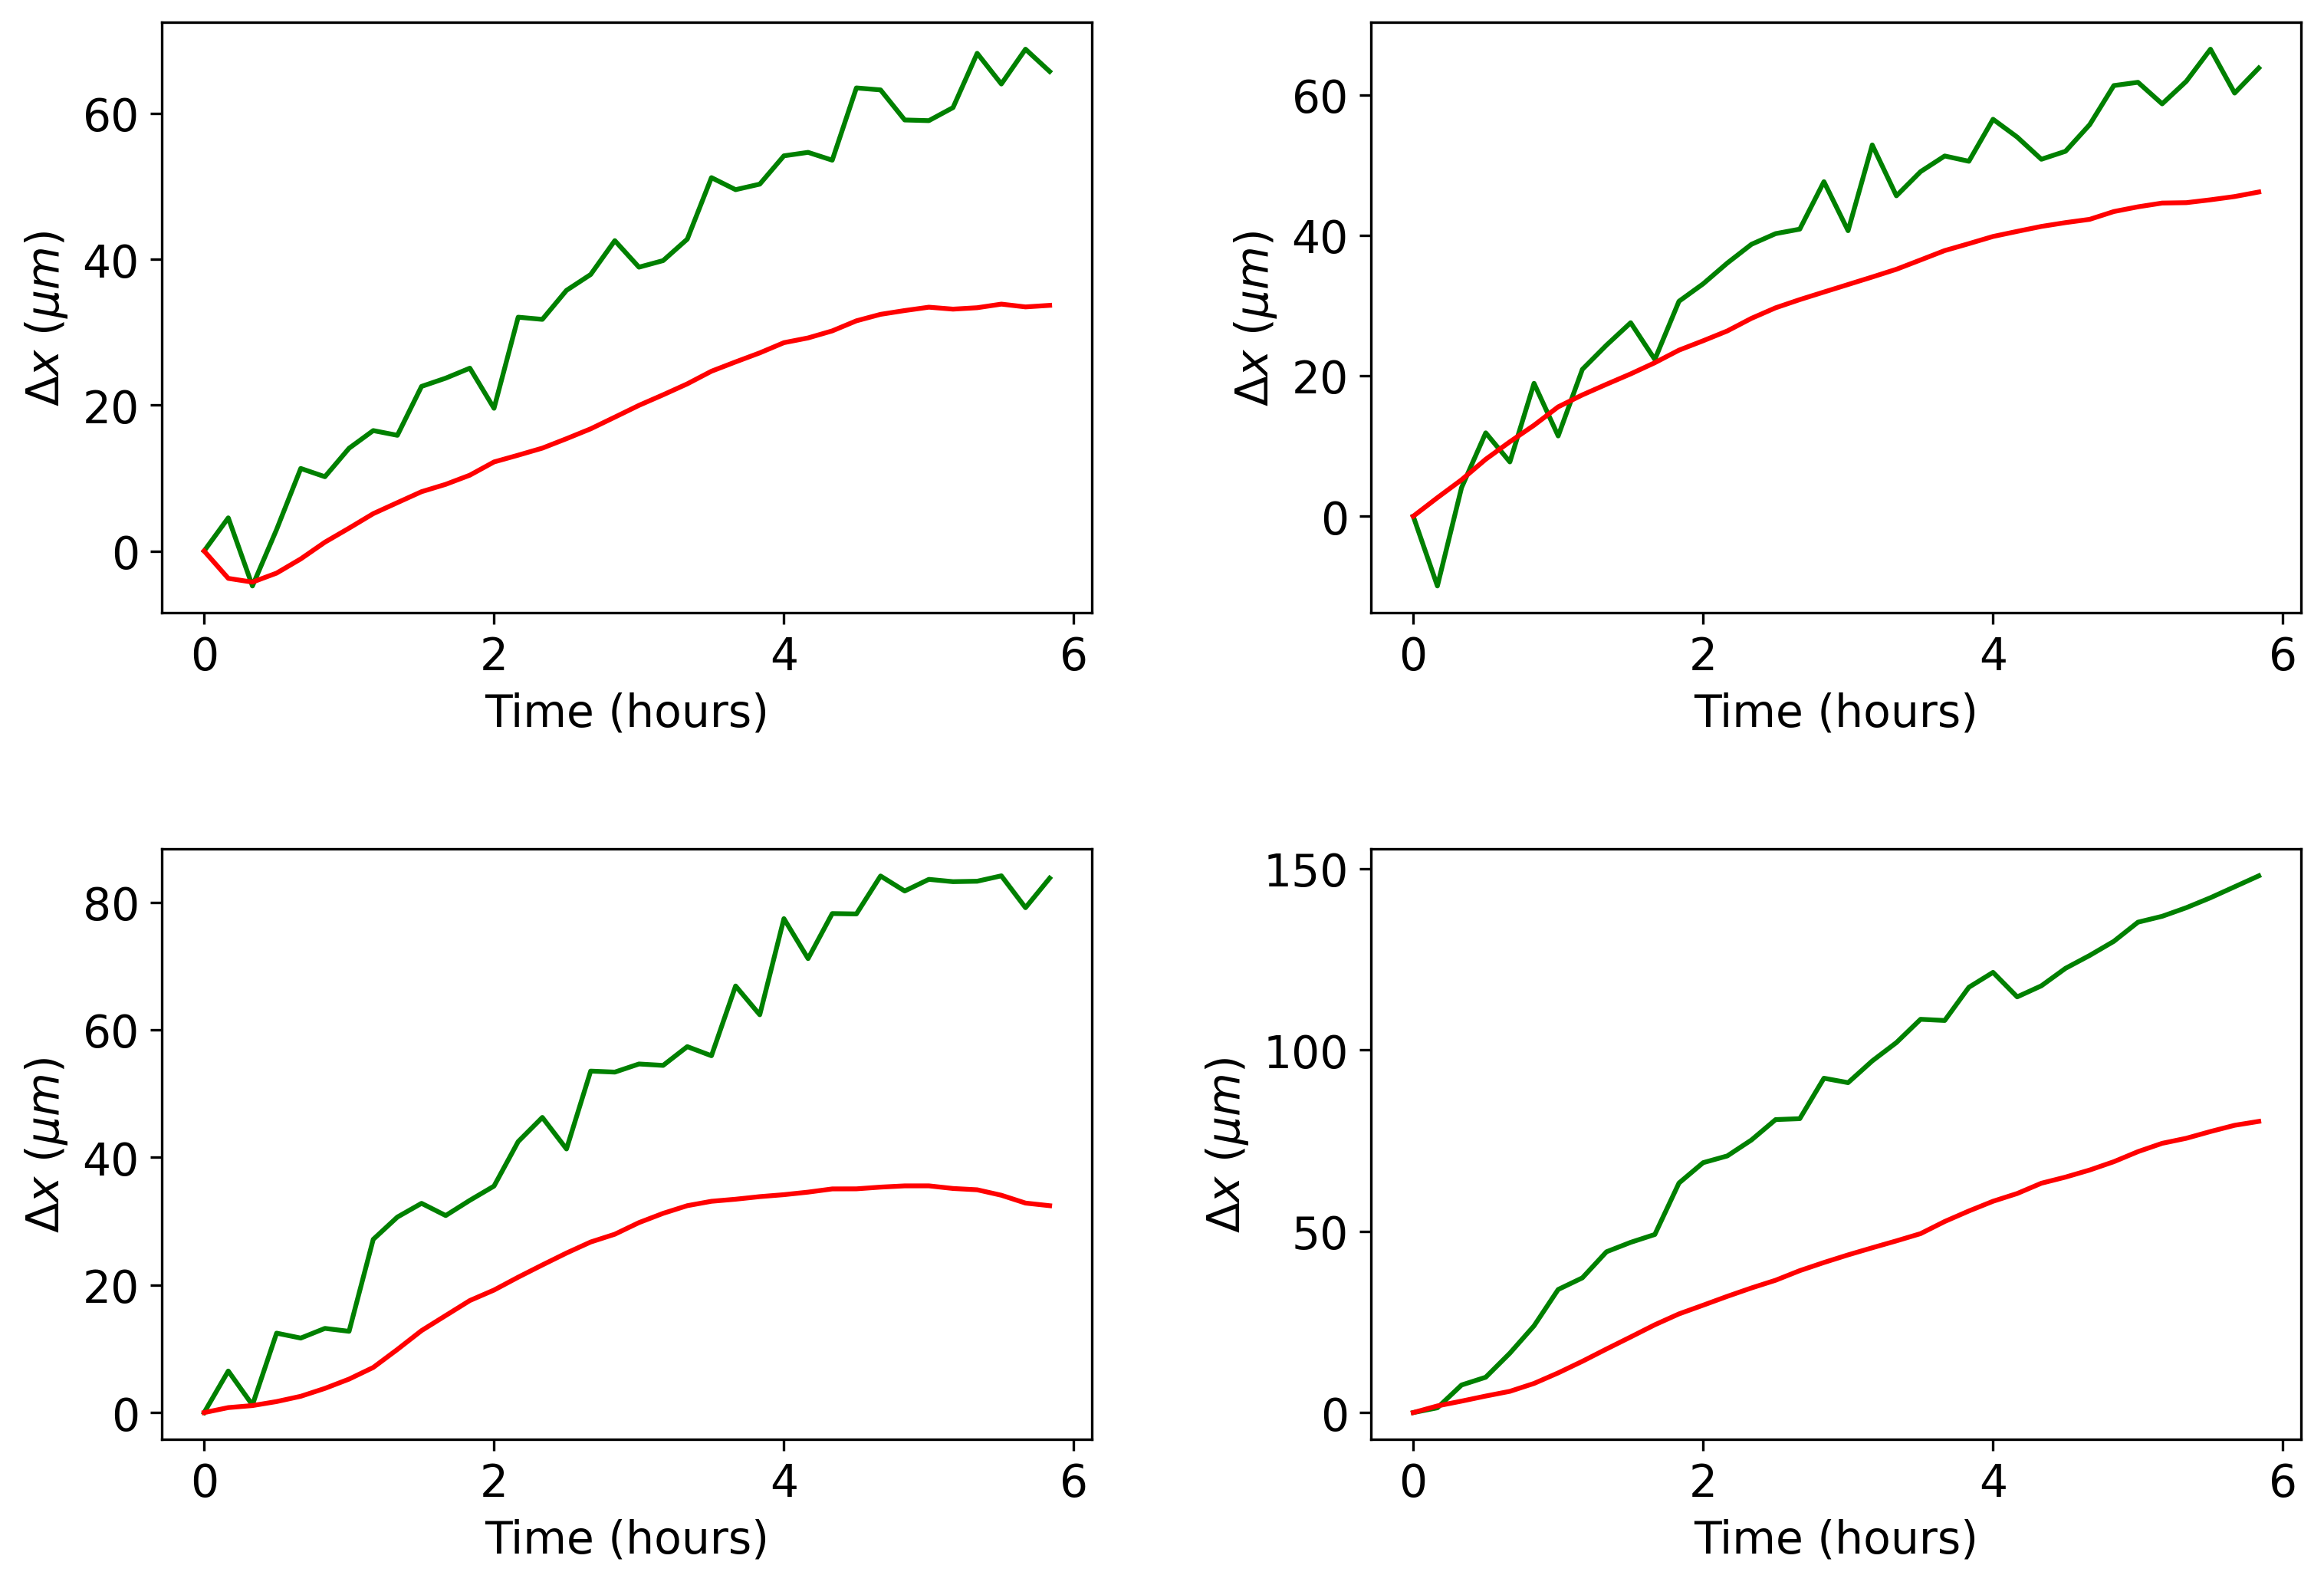

In [10]:
# --- Same data as previous plots, but now directly compare bone front and in bone ---
sc_to_plot = [0, 1, 2]; #SC methods to plot
bulk_col_heights = [1, 0, 0]; # for each bulk data frame, which column has height data?
sc_col_heights = [0, 0, 0]; # same for SC data frame
sc_col_sem = [1, 1, 1]; # same for SC data frame
t_max = 36;

plt.rc('font', size=14)

fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300);
for i1 in range(N_videos):  
    [ix, iy] = divmod(i1, 2);
    
    # Bulk data    
    for i2 in range(1): #range(len(bulk_col_heights)):
        t_all = np.arange(0, t_max_bulk_all[i1][i2])/6;
        col = bulk_col_heights[i2];
        heights_all_bulk = data_bulk_all[i1][i2].iloc[:, col];
        if i2 in normalize_height:
            heights_all_bulk = heights_all_bulk - heights_all_bulk[0];
        axs[ix, iy].plot(t_all[:t_max], heights_all_bulk[:t_max], 'g');

    # SC data
    for i2 in range(1): #range(len(sc_to_plot) ):
        t_all = np.arange(0, t_max_sc_all[i1][i2])/6;
        col = sc_col_heights[i2];
        col_sem = sc_col_sem[i2];
        heights_all = data_sc_all[i1][i2].iloc[:,col];
        sem_all = data_sc_all[i1][i2].iloc[:, col_sem]
        axs[ix, iy].plot(t_all[:t_max], heights_all[:t_max], label=names_compare[i2], color='r')
        #axs[i1].fill_between(t_all, heights_all+sem_all,heights_all-sem_all, label=names_compare[i2])
    
    #axs[ix, iy].set( title= 'Video {} ({})'.format(i1+1, dates_all[i1]), xlabel='Time (hr)', ylabel='$\\langle x(t) - x(0) \\rangle$ ($\\mu m$)'  )
    # axs[ix, iy].set( title= 'Video {}'.format(i1+1), xlabel='Time (hr)', ylabel='$\\langle x(t) - x(0) \\rangle$ ($\\mu m$)'  )
    #axs[i1].legend();

    # adjust axes
    axs[ix, iy].set(xlabel='Time (hours)', ylabel='$\Delta x$ ($\\mu m$)')
    #axs[ix, iy].set(xlim=[0, 6], ylim=[-10, 100])
    #axs[ix, iy].set_aspect(0.07)


plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Save plots
fname_out = folder_figures + 'New/' + im_label + "_plot_all_displacements_videos_1_to_4_reduced_large_font";
label = '';
# plt.savefig(fname_out + label + ".pdf")
# plt.savefig(fname_out + label + ".eps")    
plt.show()

# ---- Also plot "legend" ----
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color'];
# # define all labels
# labels_all = [None for _ in range(len(bulk_col_heights) + len(names_compare) )];
# labels_all[:len(bulk_col_heights)] = list(map( "Tissue Interface (method {})".format, np.arange(len(bulk_col_heights))+1 ))
# labels_all[len(bulk_col_heights):] =list(map( "Single Cell ({})".format, names_compare ))
# labels_all
# plt.figure(dpi=100, figsize = (5, 2) )
# for i, label in enumerate(labels_all):
#     plt.axhline(i, color=colors[i])
#     plt.text(0.1, i+0.1, label, fontsize=14)
#     plt.xticks([]);
#     plt.yticks([]);
#     plt.axis('off')
    
# Save legend
fname_out = folder_figures + im_label + "_plot_all_displacements_reduced";
label = '_legend';
# plt.savefig(fname_out + label + ".pdf")
# plt.savefig(fname_out + label + ".eps")    

plt.show()

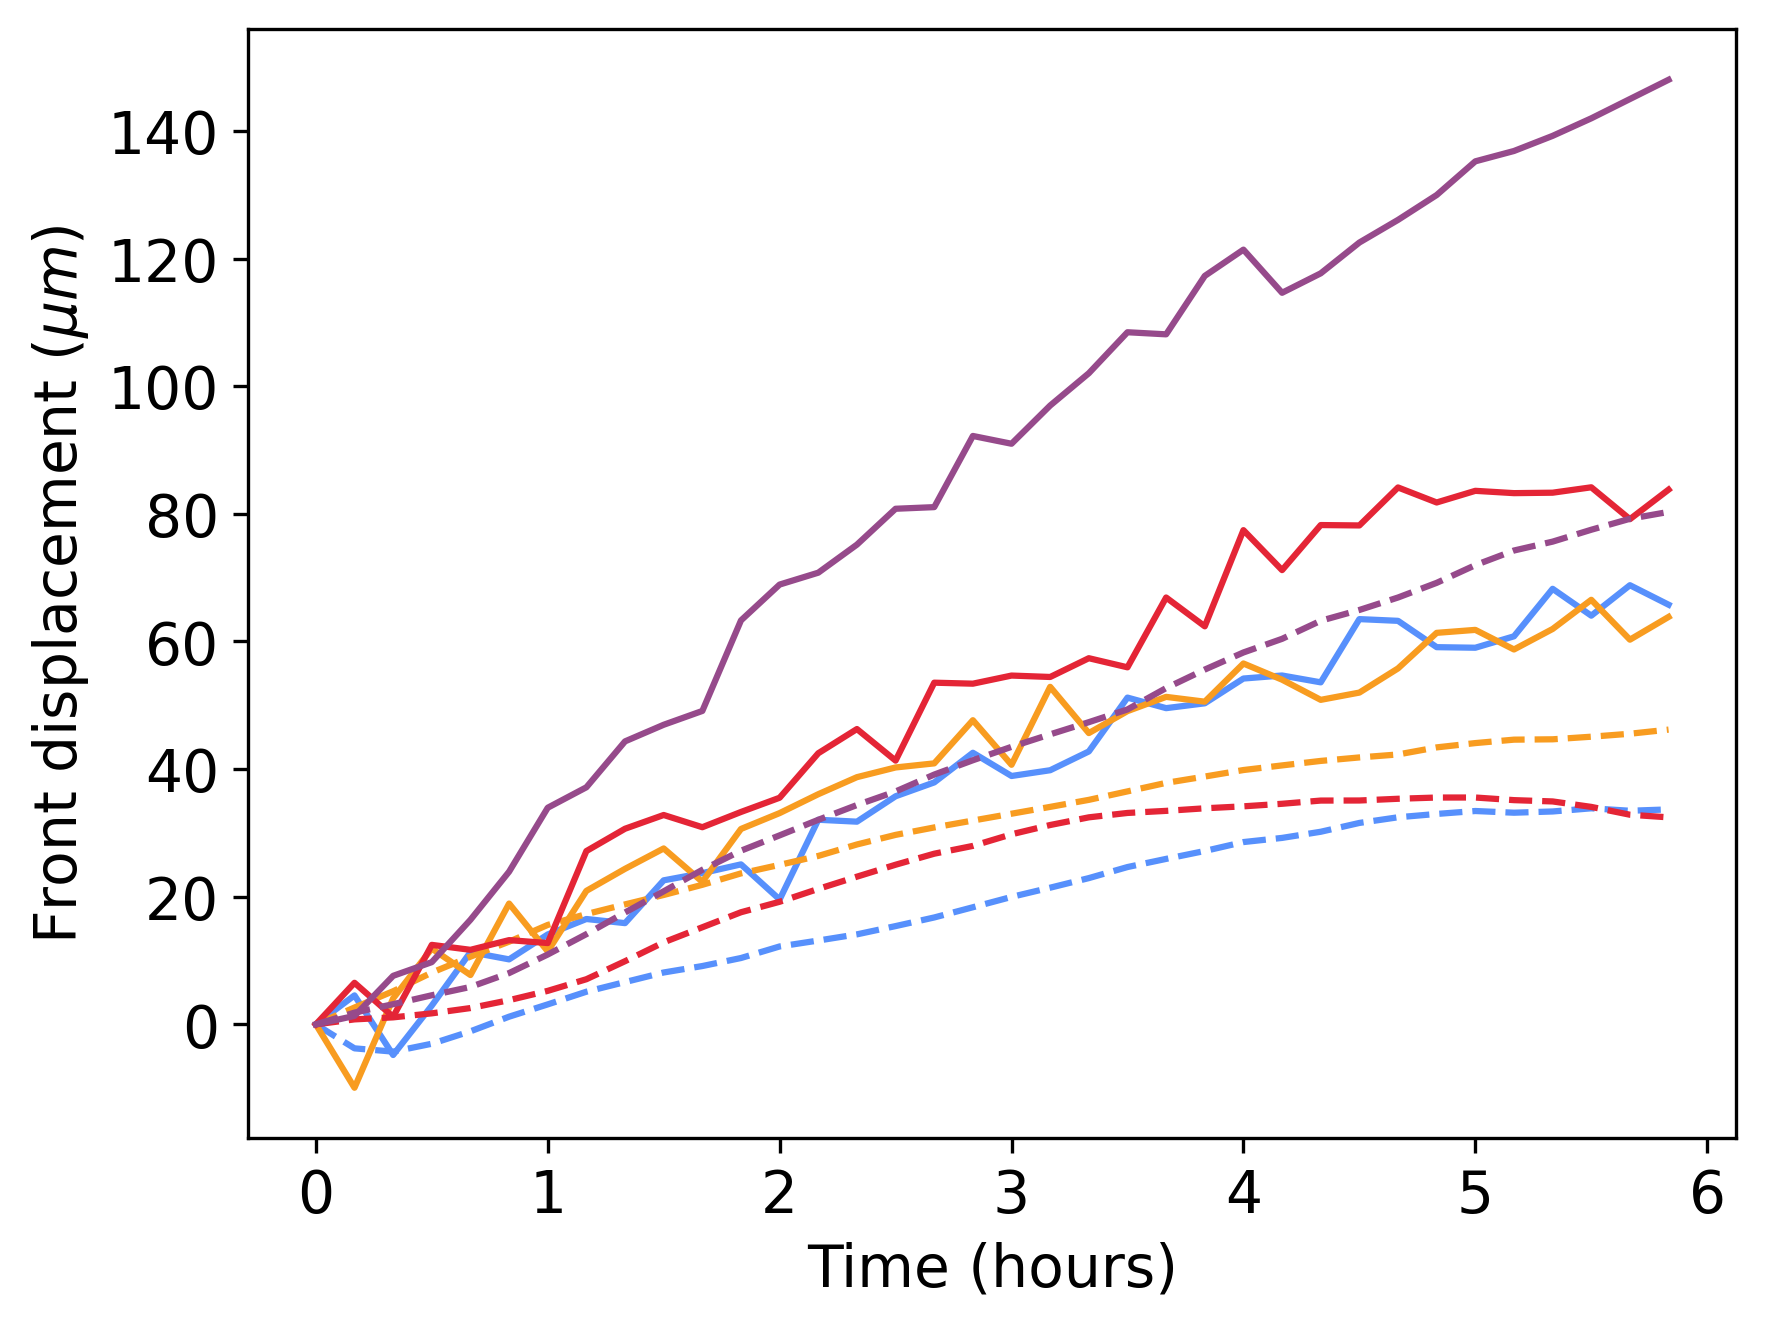

In [11]:
# Plot all fronts together
sc_to_plot = [0, 1, 2]; #SC methods to plot
bulk_col_heights = [1, 0, 0]; # for each bulk data frame, which column has height data?
sc_col_heights = [0, 0, 0]; # same for SC data frame
sc_col_sem = [1, 1, 1]; # same for SC data frame
t_max = 36;

plt.rc('font', size=14)

fig, axs = plt.subplots(dpi=300);
for i1 in range(N_videos):  
    [ix, iy] = divmod(i1, 2);
    
    # Bulk data    
    for i2 in range(1): #range(len(bulk_col_heights)):
        t_all = np.arange(0, t_max_bulk_all[i1][i2])/6;
        col = bulk_col_heights[i2];
        heights_all_bulk = data_bulk_all[i1][i2].iloc[:, col];
        if i2 in normalize_height:
            heights_all_bulk = heights_all_bulk - heights_all_bulk[0];
        axs.plot(t_all[:t_max], heights_all_bulk[:t_max], color=colors[i1]);
    
    #axs.legend(["190305", "190314", "200120", "170902"]);
    
    # SC data
    for i2 in range(1): #range(len(sc_to_plot) ):
        t_all = np.arange(0, t_max_sc_all[i1][i2])/6;
        col = sc_col_heights[i2];
        col_sem = sc_col_sem[i2];
        heights_all = data_sc_all[i1][i2].iloc[:,col];
        sem_all = data_sc_all[i1][i2].iloc[:, col_sem]
        axs.plot(t_all[:t_max], heights_all[:t_max], label=names_compare[i2], color=colors[i1], linestyle='dashed')
        #axs[i1].fill_between(t_all, heights_all+sem_all,heights_all-sem_all, label=names_compare[i2])

    
    axs.set(xlabel='Time (hours)', ylabel='Front displacement ($\\mu m$)')
    
# Save plots
fname_out = folder_figures + 'New/' + im_label + "_plot_all_front_and_cell_dynamics_videos_1_to_4_microns";
label = '';
#plt.savefig(fname_out + label + ".pdf")
#plt.savefig(fname_out + label + ".eps")    
plt.show()

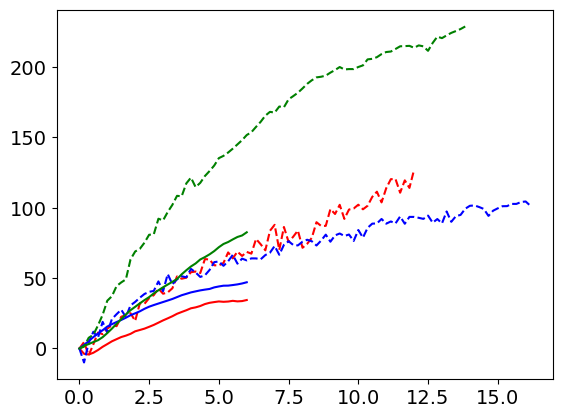

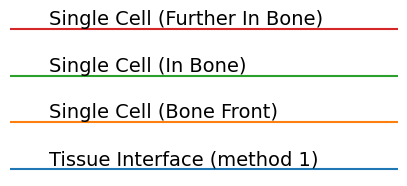

In [12]:
# --- Same data as previous plots, but now directly compare bone front and in bone ---
sc_to_plot = [0]; #, 1, 2]; #SC methods to plot
bulk_col_heights = [1]; #, 0, 0]; # for each bulk data frame, which column has height data?
sc_col_heights = [0]; #, 0, 0]; # same for SC data frame
sc_col_sem = [1]; #, 1, 1]; # same for SC data frame

color_list = ['r', 'b', '', 'g']

plt.figure(dpi=100)
#fig, axs = plt.subplots(3, 1, figsize=(12, 8), dpi=100);
for i1 in range(N_videos):
    if i1==2:
        continue
    
    # Bulk data    
    i2=0;
    t_all = np.arange(0, t_max_bulk_all[i1][i2])/6;
    col = bulk_col_heights[i2];
    heights_all = data_bulk_all[i1][i2].iloc[:, col];
    if i2 in normalize_height:
        heights_all = heights_all - heights_all[0];
    plt.plot(t_all, heights_all, '--', color=color_list[i1]);
    
    # SC data
    t_all = np.arange(0, t_max_sc_all[i1][i2])/6;
    col = sc_col_heights[i2];
    col_sem = sc_col_sem[i2];
    heights_all = data_sc_all[i1][i2].iloc[:,col];
    sem_all = data_sc_all[i1][i2].iloc[:, col_sem]
    plt.plot(t_all, heights_all, label=names_compare[i2], color=color_list[i1])
    #axs[i1].fill_between(t_all, heights_all+sem_all,heights_all-sem_all, label=names_compare[i2])
    
    #plt.set( title= 'Video {} ({})'.format(i1+1, dates_all[i1]), xlabel='Time (hr)', ylabel='$\\langle x(t) - x(0) \\rangle$ ($\\mu m$)'  )
    #axs[i1].legend();

plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Save plots
fname_out = folder_figures + im_label + "_plot_all_displacements_videos_1_to_4";
label = '';
# plt.savefig(fname_out + label + ".pdf")
# plt.savefig(fname_out + label + ".eps")    
plt.show()

# ---- Also plot "legend" ----
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'];
# define all labels
labels_all = [None for _ in range(len(bulk_col_heights) + len(names_compare) )];
labels_all[:len(bulk_col_heights)] = list(map( "Tissue Interface (method {})".format, np.arange(len(bulk_col_heights))+1 ))
labels_all[len(bulk_col_heights):] =list(map( "Single Cell ({})".format, names_compare ))
labels_all
plt.figure(dpi=100, figsize = (5, 2) )
for i, label in enumerate(labels_all):
    plt.axhline(i, color=colors[i])
    plt.text(0.1, i+0.1, label, fontsize=14)
    plt.xticks([]);
    plt.yticks([]);
    plt.axis('off')
    
# Save legend
fname_out = folder_figures + im_label + "_plot_all_displacements";
label = '_legend';
# plt.savefig(fname_out + label + ".pdf")
# plt.savefig(fname_out + label + ".eps")    

plt.show()

## Average over movies

### Calculate avg velocities

In [58]:
# bulk
velocities = np.zeros(N_videos)
for i in range(N_videos):
    velocities[i]=data_bulk_all[i][0][ data_bulk_all[i][0]['time']==6 ]['interface_height'].values/6

velocities

array([11.43524112, 10.43090859, 13.62680583, 25.27532762])

In [66]:
# single cell
velocities_sc = np.zeros(N_videos)
for i in range(N_videos):
    velocities_sc[i]=data_sc_all[i][0].iloc[36]['mean_displacement']/6

velocities_sc

array([ 5.73863636,  7.84165547,  5.28930224, 13.75830797])

In [6]:
velocities = np.array([11.43524112, 10.43090859, 13.62680583, 25.27532762])
velocities_sc = np.array([ 5.73863636,  7.84165547,  5.28930224, 13.75830797])

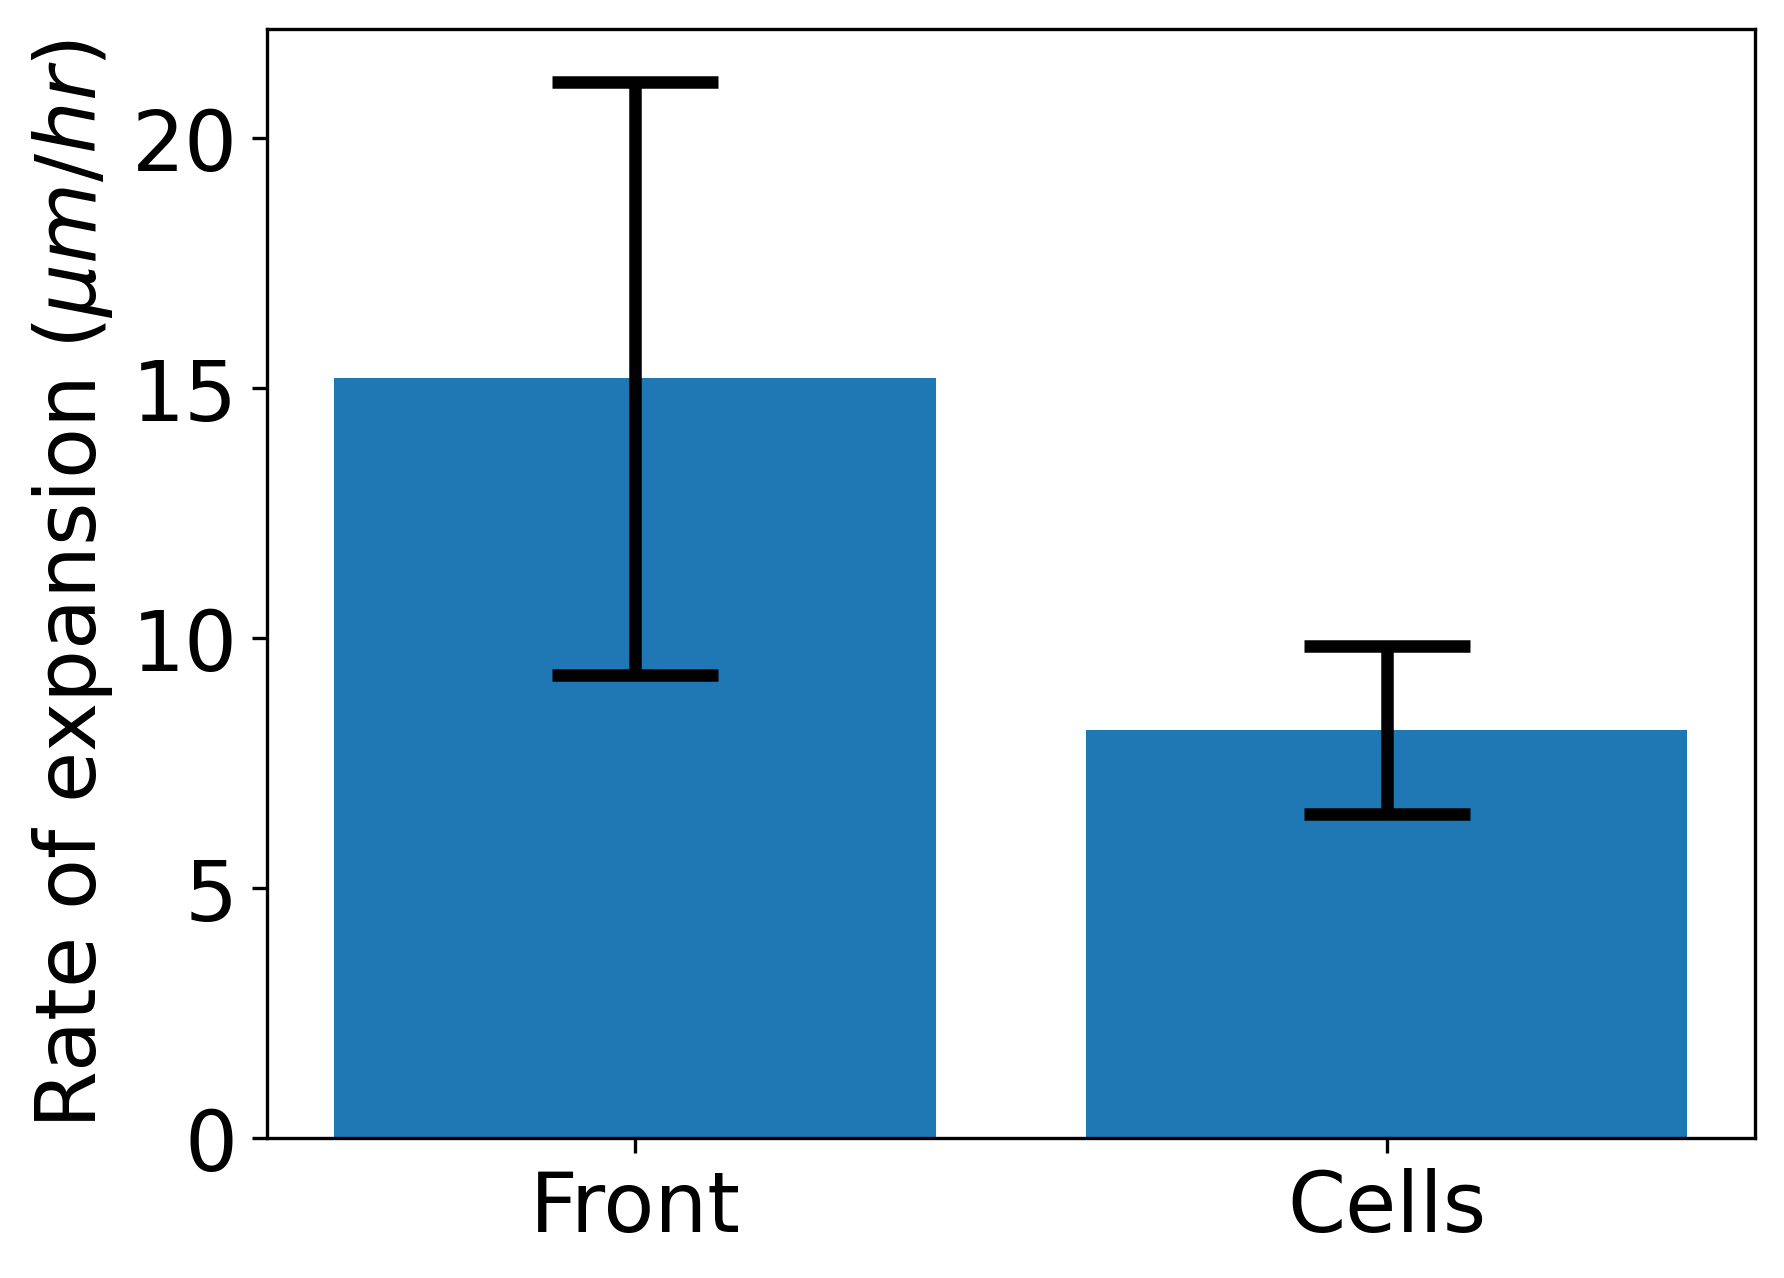

In [9]:
# matplotlib plot
plt.figure(dpi=300)
plt.bar(['Front', 'Cells'], [np.mean(velocities), np.mean(velocities_sc)] )
plt.errorbar(x=['Front', 'Cells'], y=[np.mean(velocities), np.mean(velocities_sc)],
             yerr=[np.std(velocities), np.std(velocities_sc)/np.sqrt(N_videos)], 
             barsabove=True, ecolor='k', elinewidth = 3, capsize=20, capthick=3, fmt='none' )
plt.ylabel('Rate of expansion ($\mu m/hr$)')

plt.show()

In [10]:
print( np.mean(velocities), np.std(velocities) )

15.19207079 5.935161273268962


In [132]:
import rpy2
print(rpy2.__version__)

3.3.6


In [133]:
import rpy2.robjects as robjects

In [134]:
%load_ext rpy2.ipython

In [135]:
%%R 
library(ggplot)


R[write to console]: Error in library(ggplot) : there is no package called ‘ggplot’




Error in library(ggplot) : there is no package called ‘ggplot’


### Process bulk data

In [43]:
data_bulk_all[0][0]['time'] = (data_bulk_all[0][0].index)/6
data_bulk_all[1][0]['time'] = (data_bulk_all[1][0].index)/6

data_bulk_all[0][0]['height'] = data_bulk_all[0][0]['interface_height'] - data_bulk_all[0][0]['interface_height'].loc[0]
data_bulk_all[1][0]['height'] = data_bulk_all[1][0]['interface_height'] - data_bulk_all[1][0]['interface_height'].loc[0]

# merge data into single df
data_bulk_merged = pd.merge( data_bulk_all[0][0], data_bulk_all[1][0], how='inner', on='time' )
data_bulk_merged = pd.merge( data_bulk_merged, data_bulk_all[2][0], how='inner', on='time' )
data_bulk_merged = pd.merge( data_bulk_merged, data_bulk_all[3][0], how='inner', on='time' )
data_bulk_merged

time  interface_height_x  interface_width_x    height_x  \
0    0.000000            0.000000          40.299533    0.000000   
1    0.166667            4.544052          22.647578    4.544052   
2    0.333333           -4.797860          39.220570   -4.797860   
3    0.500000            2.946671          24.071212    2.946671   
4    0.666667           11.317362          29.764940   11.317362   
5    0.833333           10.186500          33.245567   10.186500   
6    1.000000           14.089615          35.550418   14.089615   
7    1.166667           16.512383          32.083043   16.512383   
8    1.333333           15.865945          40.972012   15.865945   
9    1.500000           22.571191          32.833923   22.571191   
10   1.666667           23.702809          30.815174   23.702809   
11   1.833333           25.071838          20.985920   25.071838   
12   2.000000           19.571882          37.548875   19.571882   
13   2.166667           32.064655          30.070904   32.064655   
14   2.500000           35.743733          24.246096   35.743733   
15   2.666667           37.915714          25.525305   37.915714   
16   3.000000           38.922962          39.494621   38.922962   
17   3.166667           39.824826          39.912120   39.824826   
18   3.500000           51.203672          27.142071   51.203672   
19   3.666667           49.552142          26.585727   49.552142   
20   3.833333           50.310437          26.452507   50.310437   
21   4.000000           54.194676          27.574106   54.194676   
22   4.166667           54.668853          26.734698   54.668853   
23   4.333333           53.596346          28.139523   53.596346   
24   4.500000           63.505091          25.004651   63.505091   
25   4.666667           63.233378          23.019998   63.233378   
26   4.833333           59.110001          30.656721   59.110001   
27   5.000000           59.019610          31.214178   59.019610   
28   5.166667           60.808776          32.009742   60.808776   
29   5.333333           68.253980          28.482717   68.253980   
30   5.500000           64.044850          33.461929   64.044850   
31   6.000000           68.611447          35.925877   68.611447   
32   6.500000           74.045282          25.546997   74.045282   
33   7.000000           87.849053          21.905616   87.849053   
34   7.500000           75.668659          31.693080   75.668659   
35   8.000000           71.564482          36.770779   71.564482   
36   8.166667           74.375782          41.631079   74.375782   
37   8.333333           78.636687          33.487675   78.636687   
38   8.500000           89.717069          23.081840   89.717069   
39   8.666667           87.077167          34.500040   87.077167   
40   8.833333           87.122255          26.141508   87.122255   
41   9.000000           99.049165          22.153263   99.049165   
42   9.166667           95.561764          24.541490   95.561764   
43   9.333333          102.074147          27.097021  102.074147   
44   9.500000           92.079648          33.017511   92.079648   
45   9.666667           98.731717          22.921118   98.731717   
46   9.833333           99.438668          21.341836   99.438668   
47  10.000000          102.155262          28.039466  102.155262   
48  10.166667           98.887906          25.123575   98.887906   
49  10.333333          101.393515          24.052324  101.393515   
50  10.500000          107.707210          26.047849  107.707210   
51  10.666667          111.399016          28.032003  111.399016   
52  11.000000          113.815744          26.057027  113.815744   
53  11.500000          110.681602          25.240651  110.681602   
54  12.000000          127.020106          29.391068  127.020106   

    interface_height_y  interface_width_y   height_y  interface_height_x  \
0             0.000000          21.955039   0.000000            0.000000   
1            -9.932205          18.223773  -9.93

In [40]:
# # set time column
# data_bulk_all[0][1]['time'] = (data_bulk_all[0][1].index)/6
# data_bulk_all[1][1]['time'] = (data_bulk_all[1][1].index)/6

# # normalize heights
# data_bulk_all[0][1]['height'] = data_bulk_all[0][1]['height'] - data_bulk_all[0][1]['height'].loc[0]
# data_bulk_all[1][1]['height'] = data_bulk_all[1][1]['height'] - data_bulk_all[1][1]['height'].loc[0]

# # merge data into single df
# data_bulk_merged = pd.merge( data_bulk_all[0][0], data_bulk_all[1][0], how='inner', on='time' )
# data_bulk_merged = pd.merge( data_bulk_merged, data_bulk_all[0][1], how='inner', on='time' )
# data_bulk_merged = pd.merge( data_bulk_merged, data_bulk_all[1][1], how='inner', on='time' )
# data_bulk_merged

In [34]:
# Set normalization factors for ALL (bulk+sc) data 
col_names = ['interface_height_x', 'interface_height_y', 'height_x', 'height_y']
norm_factors = data_bulk_merged[data_bulk_merged['time']==6][col_names]
norm_factors

interface_height_x  interface_height_y   height_x   height_y
36           68.611447           62.585452  68.611447  62.585452

/Users/dang/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dang/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/dang/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

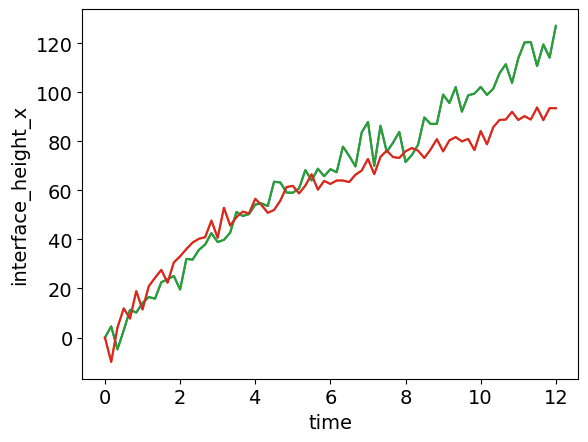

In [35]:
# Plot raw data
col_names = ['interface_height_x', 'interface_height_y', 'height_x', 'height_y']
#col_names = ['interface_width_x', 'interface_width_y', 'width_x', 'width_y']

for col in col_names:
    sns.lineplot( data_bulk_merged['time'], data_bulk_merged[col] ) 

In [ ]:
# Plot rescaled data
col_names = ['interface_height_x', 'interface_height_y', 'height_x', 'height_y']
for col in col_names:
    data_bulk_merged[col] = data_bulk_merged[col]/norm_factors[col].values[0]
    sns.lineplot( data_bulk_merged['time'], data_bulk_merged[col] ) 

In [ ]:
## Plot mean and SEM
col_names = ['interface_height_x', 'interface_height_y', 'height_x', 'height_y']
data_bulk_merged['height_mean'] = np.mean( data_bulk_merged[col_names], 1)
data_bulk_merged['height_sem'] = np.std( data_bulk_merged[col_names], 1)/np.sqrt(len(col_names));

sns.lineplot( data_bulk_merged['time'], data_bulk_merged['height_mean'] ) 
plt.fill_between( data_bulk_merged['time'], data_bulk_merged['height_mean']-data_bulk_merged['height_sem'],
                  data_bulk_merged['height_mean']+data_bulk_merged['height_sem'], alpha=0.2)
plt.xlabel('Time (hr)')
plt.ylabel('Rescaled interface height')
plt.show()                 

### Process tracked cell data

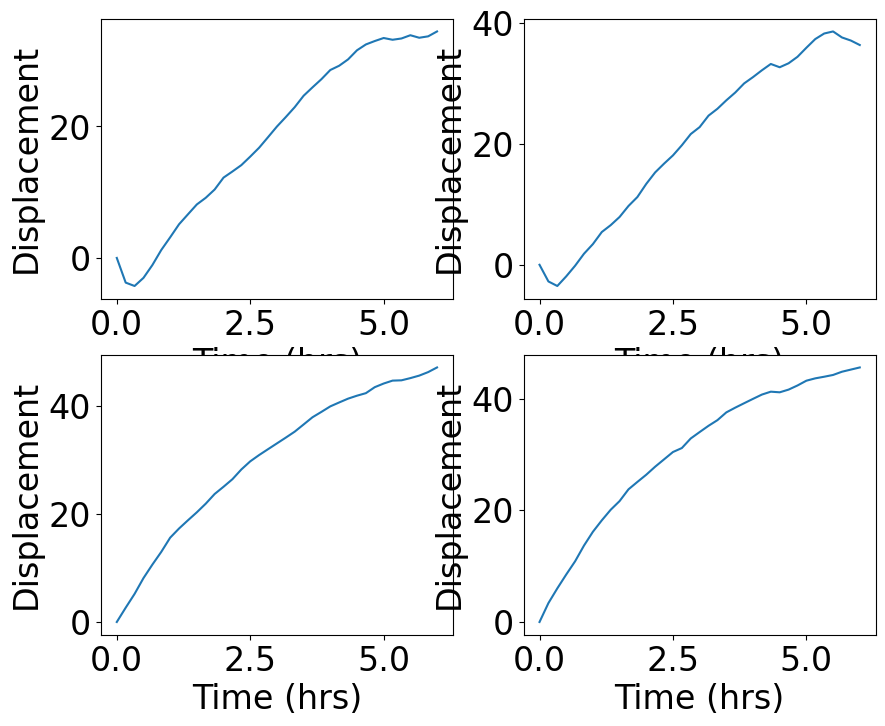

In [44]:
sc_data_merged = pd.DataFrame( [data_sc_all[0][0]['mean_displacement'], data_sc_all[0][1]['mean_displacement'], 
             data_sc_all[1][0]['mean_displacement'], data_sc_all[1][1]['mean_displacement']],
             index=['1', '2', '3', '4'] ).T
t_all = np.arange(0, sc_data_merged.shape[0])/6;

fig, ax = plt.subplots(2, 2, figsize = (10,8))
for i in range(4):
    [ix, iy] = divmod(i, 2);
    ax[ix, iy].plot( t_all,  sc_data_merged[str(i+1)] )
    ax[ix, iy].set_xlabel('Time (hrs)')
    ax[ix, iy].set_ylabel('Displacement')

No handles with labels found to put in legend.


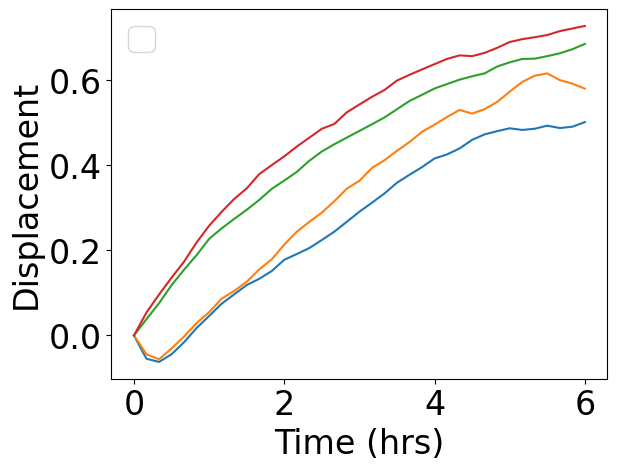

In [45]:
## Normalized data
norm_factors_np = np.array(norm_factors)[0]
for i in range(4):
    sc_data_merged[str(i+1)] = sc_data_merged[str(i+1)]/norm_factors_np[i] # normalise data
    
# Plot
plt.figure
plt.plot( t_all, sc_data_merged )
plt.xlabel('Time (hrs)')
plt.ylabel('Displacement')
plt.legend()
plt.show()

/Users/dang/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


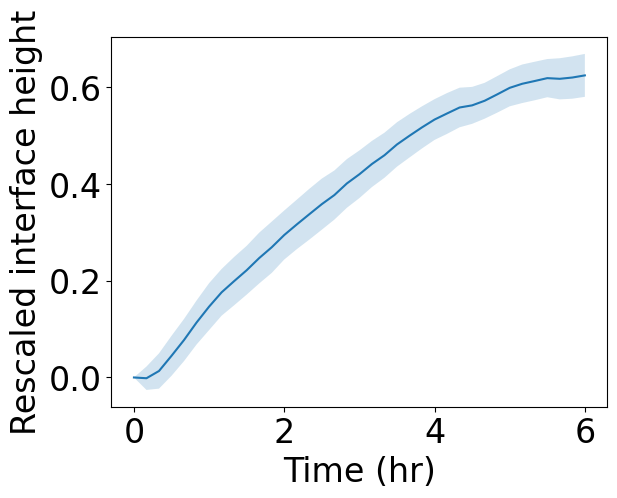

In [46]:
## Averaged data
col_names=['1', '2', '3', '4']
sc_data_merged['height_mean'] = np.mean( sc_data_merged[col_names], 1)
sc_data_merged['height_sem'] = np.std( sc_data_merged[col_names], 1)/np.sqrt(len(col_names));

sns.lineplot( t_all, sc_data_merged['height_mean'] ) 
plt.fill_between( t_all, sc_data_merged['height_mean']-sc_data_merged['height_sem'],
                  sc_data_merged['height_mean']+sc_data_merged['height_sem'], alpha=0.2)
plt.xlabel('Time (hr)')
plt.ylabel('Rescaled interface height')
plt.show()

### Plot both data together

In [37]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

In [38]:
plt.figure( figsize = (6*1.5, 4*1.5) )

# bulk
bdata_plot = data_bulk_merged.iloc[:32]
plt.plot( bdata_plot['time'], bdata_plot['height_mean'], 'g' ) 
plt.fill_between( bdata_plot['time'], bdata_plot['height_mean']-bdata_plot['height_sem'],
                  bdata_plot['height_mean']+bdata_plot['height_sem'], 'g', alpha=0.2)

# SC
plt.plot( t_all, sc_data_merged['height_mean'], 'r' ) 
plt.fill_between( t_all, sc_data_merged['height_mean']-sc_data_merged['height_sem'],
                  sc_data_merged['height_mean']+sc_data_merged['height_sem'], 'r', alpha=0.2)
plt.xlabel('Time (hr)')
plt.ylabel('Rescaled displacement')

# Save fig
save_folder = folder_figures
save_fname = "interface_g_vs_cell_tracks_red_mean_sem_4_videos"
#plt.savefig(save_folder + save_fname + "_fs20.pdf", dpi=200)
#plt.savefig(save_folder + save_fname + "_fs20.eps", dpi=200)

plt.show()

KeyError: 'height_mean'

<Figure size 900x600 with 0 Axes>

# Compare with interfaces and images

### Load image data

In [39]:
## Choose video
video = 4;
video_idx = video-1; # python index
folder_im = "/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Video {}/Video_frames/".format(video)


In [40]:
fname_ids = ["MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr)",
             "MaxProjected_Stitched_Blurred_190314 ML1 OsxGFP Explant Video 1 (0-8hr)",
             "MaxProjected_Stitched_Blurred_200120 Live Imaging OsxGFP E1375 12 hours",
             "MAX_BLUR_20200414AQR_osx_E13.5_020917.lif - TileScan_003_Merging"]

video_fname_ids = ["MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)",
                   "MaxProjected_Stitched_Blurred_190314 ML1 OsxGFP Explant Video 1 (0-8hr)",
                   "MaxProjected_Stitched_Blurred_200120 Live Imaging OsxGFP E1375 12 hours",
                   "MAX_BLUR_20200414AQR_osx_E13.5_020917.lif - TileScan_003_Merging"]
video_fname_id = video_fname_ids[video_idx]

# bounds for filtering interfaces 
lower_all = [50, 50, 700, 50] 
upper_all = [-200, -200, -150, -150];
lower = lower_all[video_idx]
upper = upper_all[video_idx]

# y axis limits for graph on the right
y_upper = [75, 75, 100, 160]
ylims = [-10, y_upper[video_idx]];

# aspect ratios
all_aspects = [0.07, 0.07, 0.06, 0.04]

### Load interface data

In [41]:
# Load interfaces
dates_all = ["190305", "190314", "200120", "170902"];
date = dates_all[video_idx];
folder_data = "/Users/dang/Documents/Projects/Tabler_skull/Data_Live_Imaging/{} Live Imaging/".format(date);
# folder_data = "/Users/dang/Documents/TablerLab/Data_Live_Imaging/{} Live Imaging/".format(date);
#folder_data = "/Users/dang/Documents/TablerLab/Data_Live_Imaging/{} Live Imaging/".format(date);

size_px_all = np.array([[3782, 2882], [5612, 2850], [4734, 3925], [4643, 2886]]);
pix_per_micron_all = [4.400, 5.1040, 5.1040, 4.4034];

# Default image label
im_label_all = ["190305_MaxProjected_Stitched_dataset(0-12hr)_YD", 
                "MaxProjected_Stitched_190314_ML1_OsxGFP_Explant_Video_1_(0-16hr)",
                "MaxProjected_Stitched_200120_Live_Imaging_OsxGFP_E1375_12_hours",
               "MAX_BLUR_20200414AQR_osx_E13.5_020917.lif - TileScan_003_Merging"];

im_label = im_label_all[video_idx];
pix_per_micron = pix_per_micron_all[video_idx];
size_px = size_px_all[video_idx];
Lx = size_px[0];
# video 4 (170902): pre-processed interface, Ly = 2861;
if video!=4:
    Ly = size_px[1];  
else:
    Ly = 2861
    
# For plotting
y_vals = np.arange(Ly);

# Load interface data
load_folder = folder_data + "/Interface_data/";
fname_in = load_folder + im_label + "_interfaces_data_processed" + ".csv";
interfaces_all_df = pd.read_csv(fname_in, index_col=0)

# convert to np array
interfaces_all_0 = np.array(interfaces_all_df); # unprocessed interface data
t_max = interfaces_all_0.shape[0]; # manually input number of time points

## Plot interface together with movie

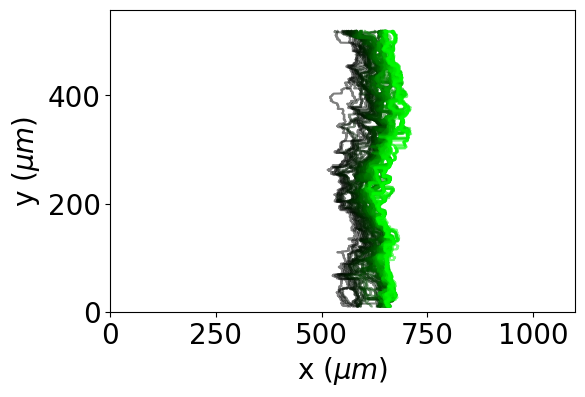

In [332]:
# Check loaded data by plotting interfaces
# Cut out parts of interface for post-processing
# lower = 800 #100;
# upper = -100; #-150;

h = plt.figure(dpi = 100);
for idx in np.arange(t_max):
    plt.plot(interfaces_all_0[idx, lower:upper]/pix_per_micron, y_vals[lower:upper]/pix_per_micron, color=[0, idx/t_max, 0, 0.5] ); # in microns
    
plt.xlabel('x ($\mu m$)')
plt.ylabel('y ($\mu m$)')
plt.xlim(0, Lx/pix_per_micron)
plt.ylim(0, Ly/pix_per_micron)

plt.show()

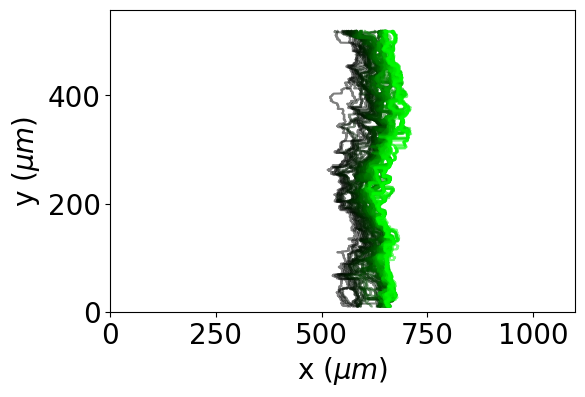

In [333]:
# Check loaded data by plotting interfaces
# Cut out parts of interface for post-processing
# lower = 0 #100;
# upper = -100; #-150;

h = plt.figure(dpi = 100);
for idx in np.arange(t_max):
    plt.plot(interfaces_all_0[idx, lower:upper]/pix_per_micron, y_vals[lower:upper]/pix_per_micron, color=[0, idx/t_max, 0, 0.5] ); # in microns
    
plt.xlabel('x ($\mu m$)')
plt.ylabel('y ($\mu m$)')
plt.xlim(0, Lx/pix_per_micron)
plt.ylim(0, Ly/pix_per_micron)

plt.show()

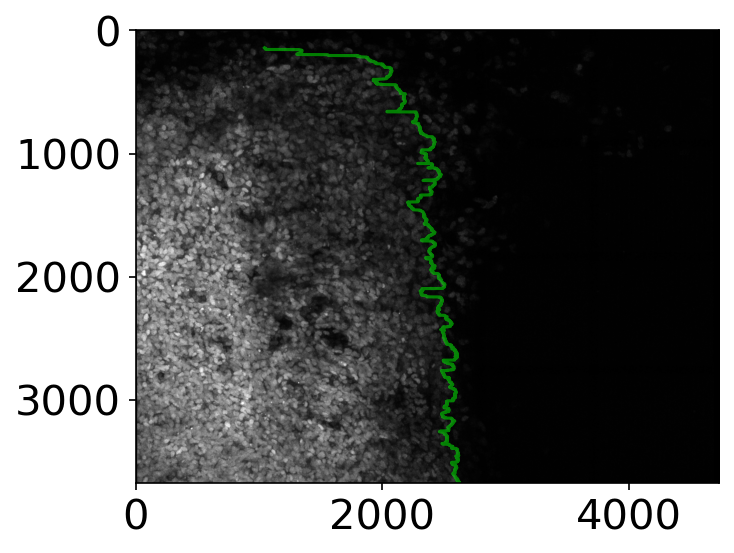

In [273]:
frame=10;

#lower = 0;
#upper = -1;

fname = fname_ids[video_idx]+"{}.tif".format(f'{frame:04}')
img = mpimg.imread( os.path.join(folder_im, fname) );
signal_all = img.astype(int); # Convert image from uint16 to int64

plt.figure(dpi=150);
plt.imshow( signal_all[lower:upper, :], aspect=1, cmap="gray" ) 
plt.plot(interfaces_all_0[frame, lower:upper], y_vals[:upper-lower], color=[0, idx/t_max, 0, 0.5] ); # in microns

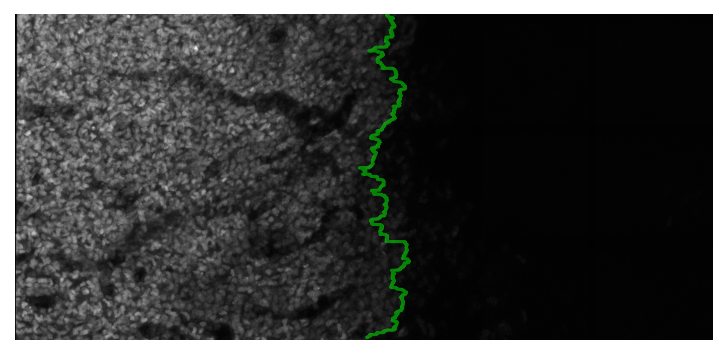

In [334]:
# Plot frame + interface (Test)
frame=10;

# lower = 0;
# upper = -1;

fname = fname_ids[video_idx]+"{}.tif".format(f'{frame:04}')
img = mpimg.imread( os.path.join(folder_im, fname) );
signal_all = img.astype(int); # Convert image from uint16 to int64

plt.figure(dpi=150);
plt.imshow( signal_all[lower:upper, :], aspect=1, cmap="gray" ) 
plt.plot(interfaces_all_0[frame, lower:upper], y_vals[:upper-lower], color=[0, idx/t_max, 0, 0.5] ); # in microns
plt.axis('off')

# save figure
#save_folder = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/Image_with_plots_w_interface/";
#save_fname = "Image_w_interface_"+video_fname_id+"_{}.tif".format(f'{frame:04}');
#plt.savefig(save_folder + save_fname)

plt.show();

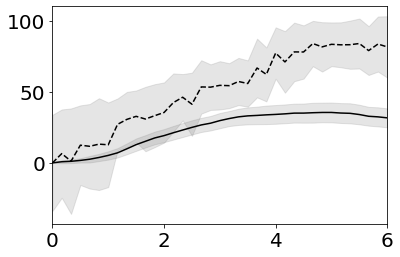

In [259]:
# Plot graph (test)
i1=video_idx;
i2=0;
t_max = 37;

plt.figure();
# Tissue data
t_all = np.arange(0, t_max_bulk_all[i1][i2])/6;
col = bulk_col_heights[i2];
heights_all = data_bulk_all[i1][i2].iloc[:, col];
widths_all = data_bulk_all[i1][i2]['interface_width'];
if i2 in normalize_height:
    heights_all = heights_all - heights_all[0];
plt.fill_between(t_all[:t_max], heights_all[:t_max]+widths_all[:t_max],heights_all[:t_max]-widths_all[:t_max], alpha=0.2, color='gray', label=names_compare[i2])
plt.plot(t_all[:t_max], heights_all[:t_max], 'k--');

# SC data
t_all = np.arange(0, t_max_sc_all[i1][i2])/6;
col = sc_col_heights[i2];
col_sem = sc_col_sem[i2];
heights_all = data_sc_all[i1][i2].iloc[:,col];
#sem_all = data_sc_all[i1][i2].iloc[:, col_sem];
std_all = data_sc_all[i1][i2]["STD"];
plt.fill_between(t_all[:t_max], heights_all[:t_max]+std_all[:t_max],heights_all[:t_max]-std_all[:t_max], alpha=0.2, color='gray', label=names_compare[i2])
plt.plot(t_all[:t_max], heights_all[:t_max], label=names_compare[i2], color='k')
#axs[i1].fill_between(t_all, heights_all+sem_all,heights_all-sem_all, label=names_compare[i2])

plt.xlim(0, 6)
#plt.ylim(-10, 75)

plt.show()

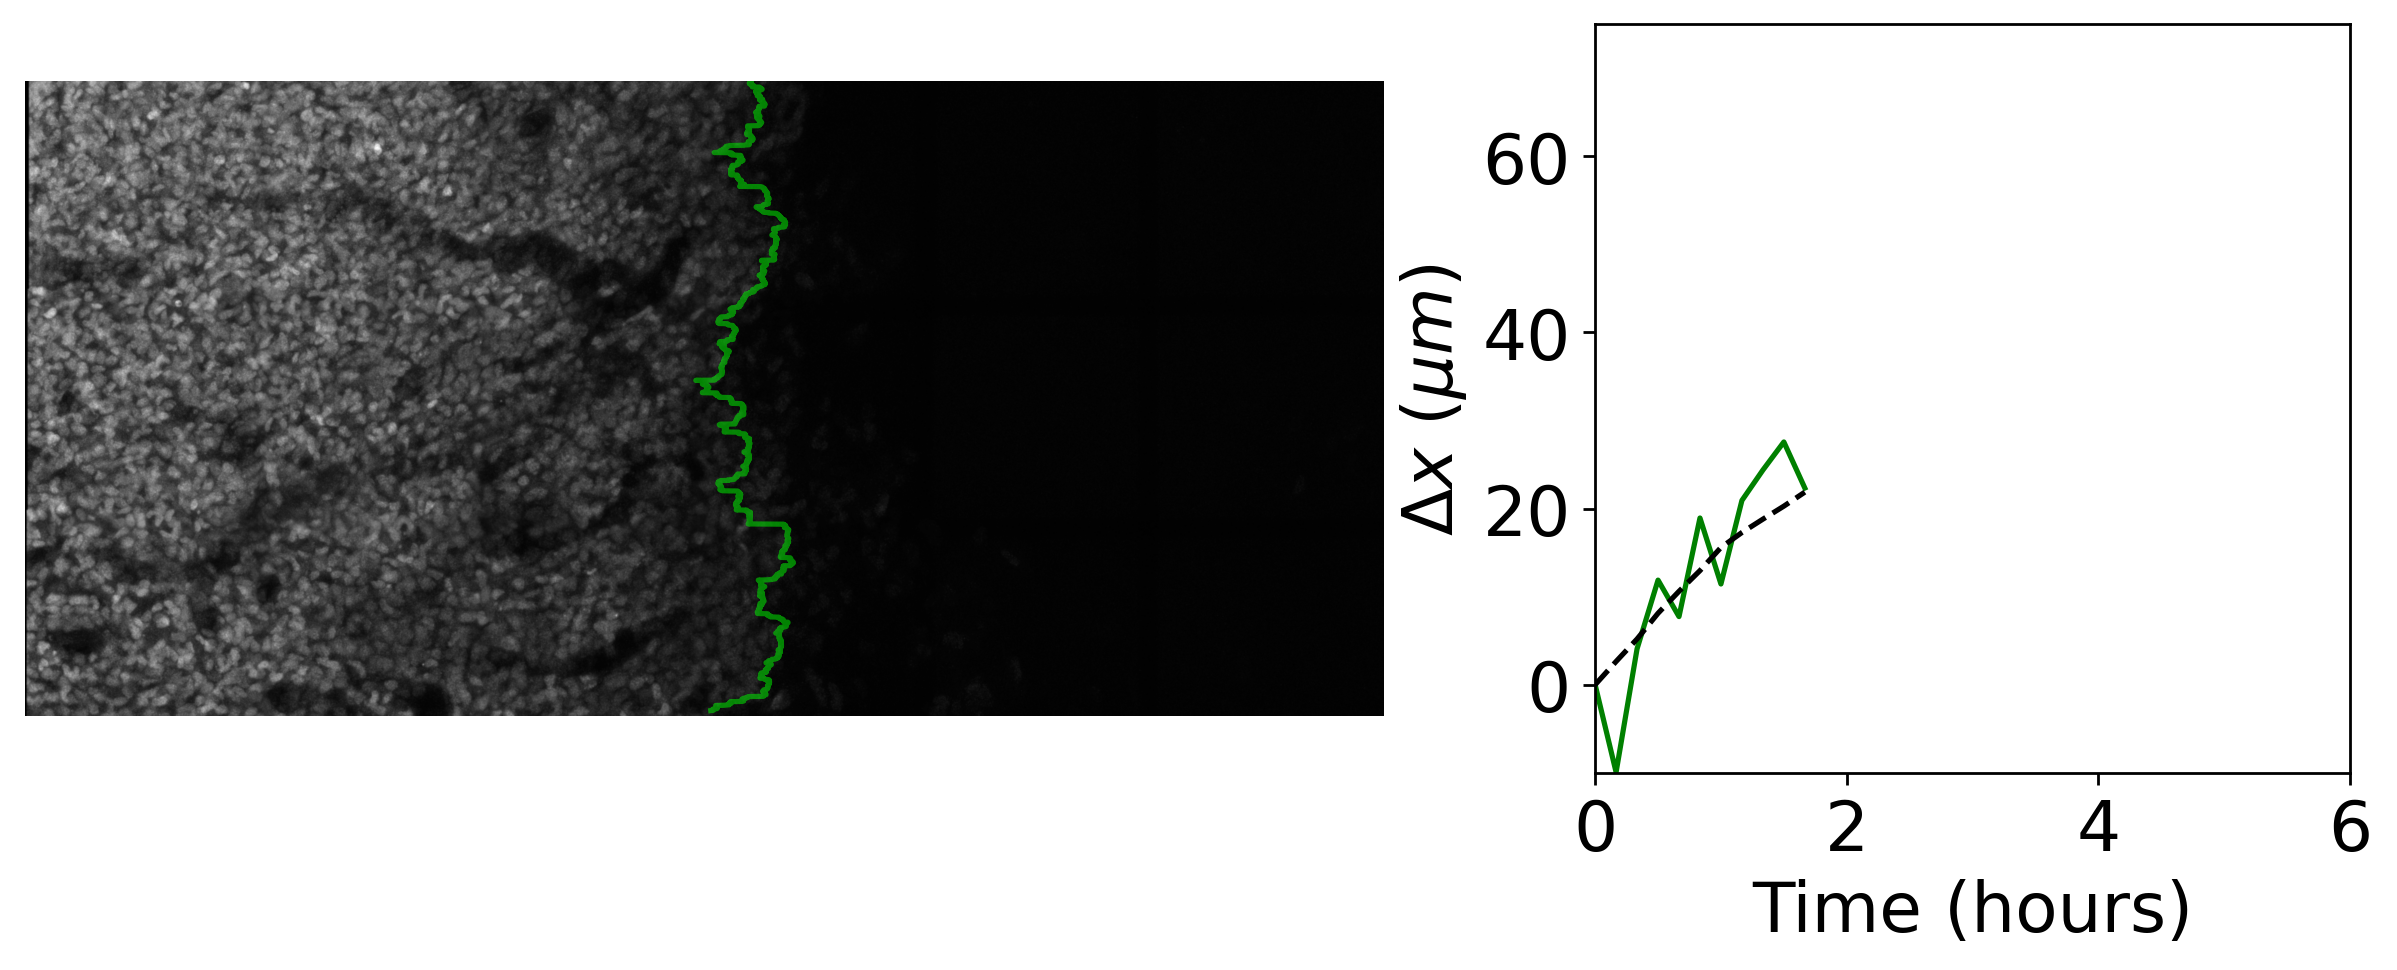

In [335]:
# Plot together and save
i1=video_idx;
i2=0;
tmax=37;

for frame in range(10, 11): #range(tmax):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios':[1.8,1]}, dpi=250) # figsize=(12, 5)

    # Plot image
    #fname = "Bone Front Overlay Dots & Lines MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr){}.tif".format(f'{frame:04}')
    #img = mpimg.imread(folder + fname);
    fname = fname_ids[video_idx]+"{}.tif".format(f'{frame:04}')
    img = mpimg.imread( os.path.join(folder_im, fname) );

    signal_all = img.astype(int); # Convert image from uint16 to int64
    axs[0].imshow(signal_all[lower:upper, :], aspect=1, cmap="gray" ) 
    axs[0].plot(interfaces_all_0[frame, lower:upper], y_vals[:upper-lower], color=[0, 1, 0, 0.5] ); # in microns

    axs[0].axis('off')
    axs[0].set_aspect(1)

    # Plot data 
    t = frame+1;
    # (1) bulk
    t_all = np.arange(0, t_max_bulk_all[i1][i2])/6;
    col = bulk_col_heights[i2];
    heights_all = data_bulk_all[i1][i2].iloc[:, col];
    if i2 in normalize_height:
        heights_all = heights_all - heights_all[0];
    axs[1].plot(t_all[:t], heights_all[:t], 'g-');    

    # (2) cell tracks
    t_all = np.arange(0, t_max_sc_all[i1][i2])/6;
    col = sc_col_heights[i2];
    col_sem = sc_col_sem[i2];
    heights_all = data_sc_all[i1][i2].iloc[:,col];
    sem_all = data_sc_all[i1][i2].iloc[:, col_sem]
    axs[1].plot(t_all[:t], heights_all[:t], '--', color='k', label=names_compare[i2])
    
    # adjust axes
    axs[1].set(xlabel='Time (hours)', ylabel='$\Delta x$ ($\\mu m$)')
    axs[1].set(xlim=[0, 6], ylim=[-10, 75])
    axs[1].set_aspect(0.07)

    plt.subplots_adjust(wspace=0.2)

    # save figure
#     save_folder = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/Image_with_plots_w_interface/";
    save_fname = "Image_and_plots_w_interface_"+video_fname_id+"_{}.tif".format(f'{frame:04}');
#     save_fname = "Image_and_plots_combined_MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)_{}.tif".format(f'{frame:04}');
    #plt.savefig(save_folder + save_fname)

    plt.show();

In [211]:
# Alternative method (not used)
# from PIL import Image
# # Load video
# #folder = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/Video 1/";
# #fname = "MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr).tif";
# #fname = "Bone Front Overlay Dots & Lines MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr).avi";

# # folder = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/Video 1/Video_frames/"
# # i=0; # frame number
# # fname = "Bone Front Overlay Dots & Lines MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr){}.tif".format(f'{i:04}')

# folder = '/Users/dang/Documents/TablerLab/Data_Live_Imaging/Interface_movies/'
# fname = 'ImageSequence/Composite_z001_c001.tif'
# fname2 = 'Composite_z001_c002.tif'
# fname2 = '1_190305.tif'

# image1 = Image.open(folder + fname)
# image1.show()
# image2 = Image.open(folder + fname2)
# image2.show()

# image1_size = image1.size;

# new_image = Image.new('RGB',(image1_size[0], image1_size[1]), (250,250,250))
# new_image.paste(image2, (0,0))
# new_image.paste(image1, (0,0))

# new_image.save('test.tif')
# new_image.show()
# #img = mpimg.imread(folder + fname);
# #signal_all = img.astype(int); # Convert image from uint16 to int64

## Plot Cell Tracks on top of images

### Load cell tracks data and pre-process

In [42]:
# Load cell tracks data
video_image_sizes = np.array([[859.55, 655], [1099.53, 562.5], [927.51, 769.01], [1054.42, 655.50] ]); # in microns
#data_path = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/";
data_path = "/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/"
fname_templates = ["Results from MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr) in um per min.csv",
                  "Results from MaxProjected_Stitched_Blurred_190314 ML1 OsxGFP Explant Video 1 (0-8hr) in um per sec.csv",
                   "Results from MaxProjected_Stitched_Blurred_200120 Live Imaging OsxGFP E1375 12 hours in um per sec.csv",
                  "Results from MAX_BLUR_20200414AQR_osx_E13 in um per min.csv"]

filenames_all = [["{} {}".format(x,y) for x in names_compare] for y in fname_templates ];
N_videos = len(fname_templates);
N_files_per_video = len(names_compare);
video_image_sizes_pix = [[int(pix_per_micron_all[i]*video_image_sizes[i, j]) for j in range(2)] for i in range(N_videos)]; # in pixels

loaded_data_all = [[None]*N_files_per_video for _ in range(N_videos)];
for i in range(N_videos):    
    subfolder = "Video {}/".format(i+1);
    for j in range(N_files_per_video):
        loaded_data_all[i][j] = pd.read_csv(data_path+subfolder+filenames_all[i][j]);

In [43]:
# Total number of cells
N_cells_all = [ [len(np.unique(loaded_data_all[i][j].Track)) for j in range(N_files_per_video) ] for i in range(N_videos)];
print("Number of cells = " + str(N_cells_all))

# Number of slices per cell
N_slices_all = [ [len(np.unique(loaded_data_all[i][j].Slice)) for j in range(N_files_per_video)] for i in range(N_videos)];
print("Number of slices(=frames) per cell = " + str(N_slices_all))

Number of cells = [[46, 23, 36], [47, 31, 34], [52, 24, 39], [54, 39, 30]]
Number of slices(=frames) per cell = [[73, 73, 73], [49, 49, 49], [73, 73, 73], [85, 85, 85]]


In [44]:
X_all_all = [[None]*N_files_per_video for _ in range(N_videos)];
Y_all_all = [[None]*N_files_per_video for _ in range(N_videos)];
tracks_all_all = [[None]*N_files_per_video for _ in range(N_videos)];

for i1 in range(N_videos):
    pix_per_micron = pix_per_micron_all[i1];
    for i2 in range(N_files_per_video):
        loaded_data = loaded_data_all[i1][i2];
        N_cells = N_cells_all[i1][i2];
        N_slices = N_slices_all[i1][i2];
        
        # Extract X and Y coordinates for each cell
        X_all = np.nan*np.zeros([N_cells, N_slices]);
        Y_all = np.nan*np.zeros([N_cells, N_slices]);
        tracks_all = np.unique(loaded_data.Track); # Cell track numbers

        for i in range(len(tracks_all)):
            track = tracks_all[i];
            # select cell i
            data_cell_i = loaded_data.loc[loaded_data.Track == track];
            slices_cell_i = data_cell_i.Slice-1;

            # store data
            X_all[i, slices_cell_i] = data_cell_i.X;
            Y_all[i, slices_cell_i] = data_cell_i.Y; 

        X_all_all[i1][i2] = X_all;
        Y_all_all[i1][i2] = Y_all;
        tracks_all_all[i1][i2] = tracks_all;           

In [45]:
# time range to plot
t_lower = 0; # starting time in hrs
t_upper = 6; # final time in hrs
slice_range = np.arange(t_lower*6, t_upper*6+1); # hours*6
#slice_range = range(Nslices) #full range

# colors for categories
#colors_cats = ['gray', 'pink', 'black'];
colors_cats = [(0, 0, 0),  (1/3, 1/3, 1/3), (2/3, 2/3, 2/3)];

# system default colors
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color'];

In [46]:
# Earlier settings
sc_to_plot = [0]; #, 1, 2]; #SC methods to plot
bulk_col_heights = [1]; #, 0, 0]; # for each bulk data frame, which column has height data?
sc_col_heights = [0]; #, 0, 0]; # same for SC data frame
sc_col_sem = [1]; #, 1, 1]; # same for SC data frame

### Plot tracks with images

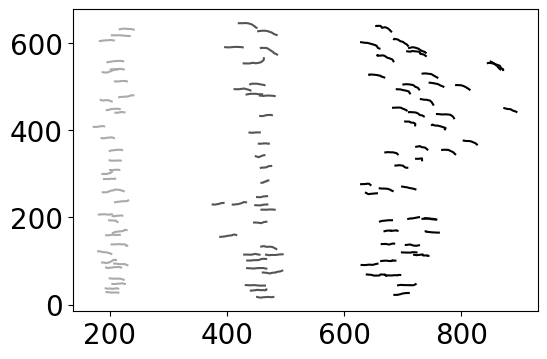

In [340]:
frame = 10;

plt.figure(dpi=100)   
i1 = video_idx;
for i2 in range(N_files_per_video):
    X_all = X_all_all[i1][i2];
    Y_all = Y_all_all[i1][i2];  
    N_cells = N_cells_all[i1][i2];
    plt.plot(X_all[:, :frame].T/pix_per_micron, Y_all[:, :frame].T/pix_per_micron, color=colors_cats[i2]);

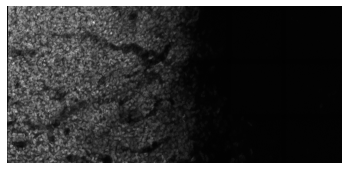

In [341]:
# Plot image
# fname = "Bone Front Overlay Dots & Lines MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr){}.tif".format(f'{frame:04}')
# img = mpimg.imread(folder + fname);
fname = fname_ids[video_idx]+"{}.tif".format(f'{frame:04}')
img = mpimg.imread( os.path.join(folder_im, fname) );
signal_all = img.astype(int); # Convert image from uint16 to int64
plt.imshow(signal_all[lower:upper, :], aspect=1, cmap="gray" ) 
plt.axis('off')
plt.show();

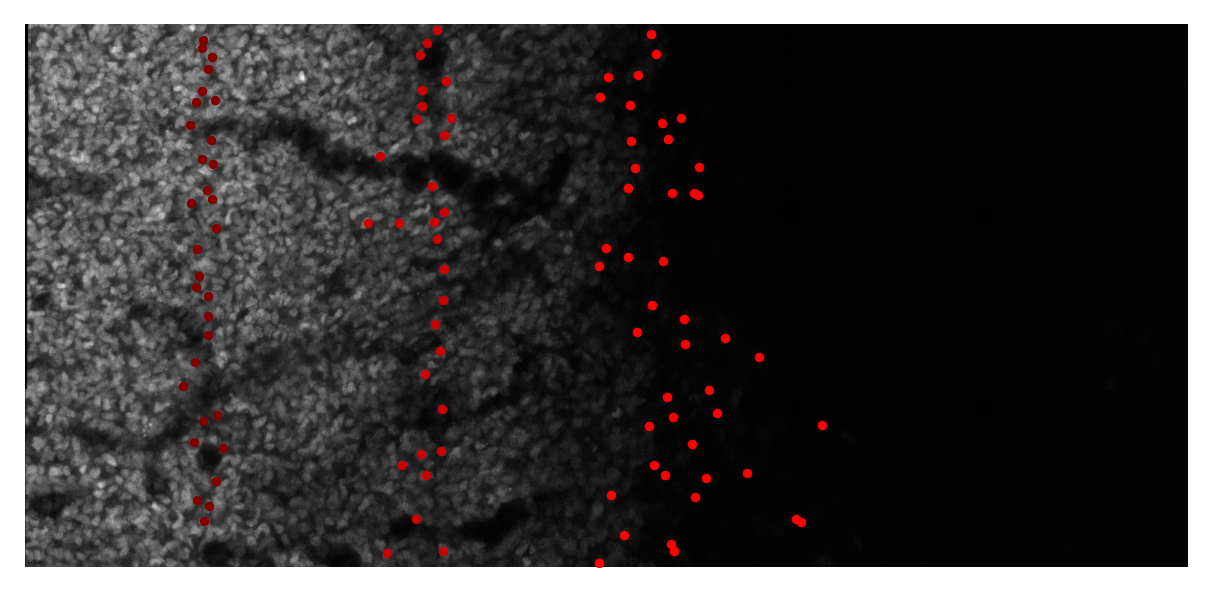

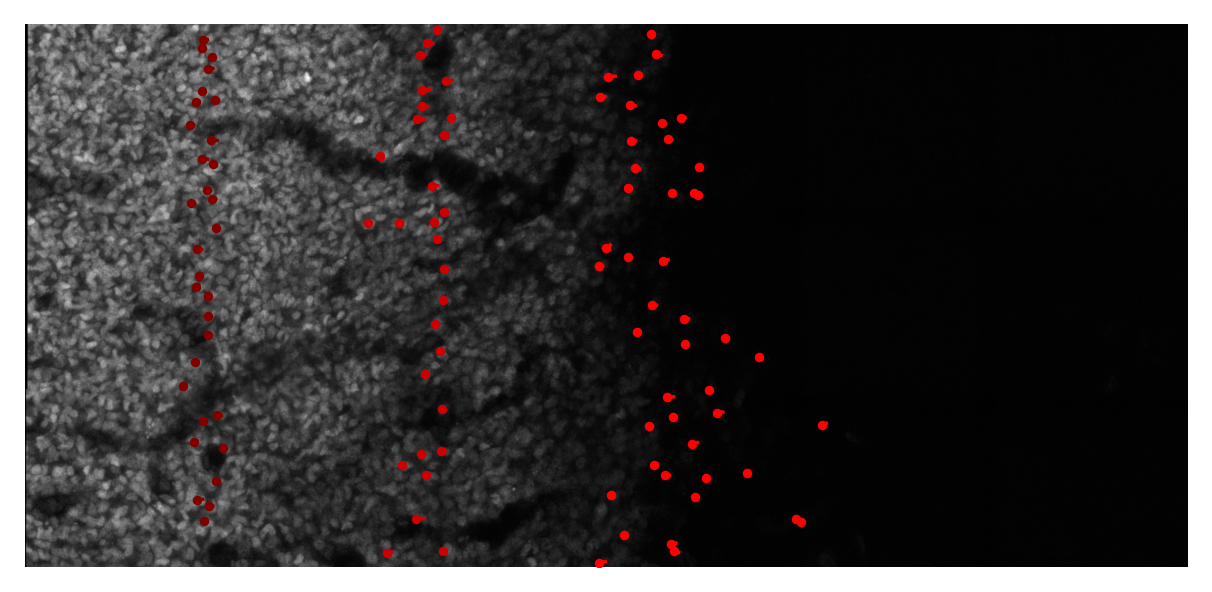

In [350]:
# Plot together
i1=video_idx;
tmax=37;
#folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Video 1/Video_frames/"

colors_all = [[1, 0, 0], [0.8, 0, 0], [0.5, 0, 0]]; # colors for the groups of cells

for frame in range(2): # range(tmax):
    fig = plt.figure(dpi=250)

    # Plot image
    fname = fname_ids[video_idx]+"{}.tif".format(f'{frame:04}')
    img = mpimg.imread( os.path.join(folder_im, fname) );
    #fname = "Bone Front Overlay Dots & Lines MaxProjected_Stitched_Blurred_190305 ML1 OsxGFP Explant Video 1 (0-12hr){}.tif".format(f'{frame:04}')
    #img = mpimg.imread(folder + fname);
    
    signal_all = img.astype(int); # Convert image from uint16 to int64
    plt.imshow(signal_all[lower:upper, :], aspect=1, cmap="gray" ) 
    plt.axis('off')

    # Plot tracks
    for i2 in range(N_files_per_video):
        X_all = X_all_all[i1][i2];
        Y_all = Y_all_all[i1][i2];  
        #N_cells = N_cells_all[i1][i2];

        # --- filter out tracks which are outside of image
        Y_all_temp = Y_all - lower; # adjust Y-values according to cutoff
        #img_height = signal_all[lower:upper, :, :].shape[0];
        img_height = signal_all[lower:upper, :].shape[0];
        
        X_all_filtered = np.array([np.zeros(tmax)]);
        Y_all_filtered = np.array([np.zeros(tmax)]);
        for idx in range(Y_all.shape[0]):
            if (np.nanmin(Y_all_temp[idx,:tmax])>0) & (np.nanmax(Y_all_temp[idx,:tmax])<img_height):
                X_all_filtered = np.append(X_all_filtered, [X_all[idx, :tmax]], axis=0);
                Y_all_filtered = np.append(Y_all_filtered, [Y_all_temp[idx, :tmax]], axis=0);

        X_all_filtered = X_all_filtered[1:];
        Y_all_filtered = Y_all_filtered[1:];
        # --- ---
        plt.plot(X_all_filtered[:, :frame+1].T, Y_all_filtered[:, :frame+1].T, linewidth=1, color=colors_all[i2]);
        plt.scatter(X_all_filtered[:, 0].T, Y_all_filtered[:, 0].T, s=3, marker='o', color=colors_all[i2]); # plot starting point
        
    # Save image
#     save_folder = "/Users/dang/Documents/TablerLab/Data_Adrian_cell_tracks/Image_with_cell_tracks/";
    save_fname = "Image_and_plots_w_interface_"+video_fname_id+"_{}.tif".format(f'{frame:04}');
#     save_fname = "Image_and_cell_tracks_combined_MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)_{}.tif".format(f'{frame:04}');
    #plt.savefig(save_folder + save_fname)
    
    plt.show();

In [347]:
X_all_filtered = np.array([np.zeros(t_max)]);
Y_all_filtered = np.array([np.zeros(t_max)]);
# for idx in range(Y_all.shape[0]):
#     if (np.nanmin(Y_all_temp[idx,:tmax])>0) & (np.nanmax(Y_all_temp[idx,:tmax])<img_height):
#         X_all_filtered = np.append(X_all_filtered, [X_all[idx, :tmax]], axis=0);
#         Y_all_filtered = np.append(Y_all_filtered, [Y_all_temp[idx, :tmax]], axis=0);

X_all_filtered = X_all_filtered[1:];
Y_all_filtered = Y_all_filtered[1:];

X_all_filtered

array([], shape=(0, 98), dtype=float64)

In [ ]:
# Plot tracks
i1=video_idx;
colors_all = [[1, 0, 0], [0.8, 0, 0], [0.5, 0, 0]];
for i2 in range(N_files_per_video):
    X_all = X_all_all[i1][i2];
    Y_all = Y_all_all[i1][i2];  
    #N_cells = N_cells_all[i1][i2];

    # --- filter out tracks which are outside of image
    Y_all_temp = Y_all - lower; # adjust Y-values according to cutoff
    #img_height = signal_all[lower:upper, :, :].shape[0];
    img_height = signal_all[lower:upper, :].shape[0];

    X_all_filtered = np.array([np.zeros(t_max)]);
    Y_all_filtered = np.array([np.zeros(t_max)]);
    for idx in range(Y_all.shape[0]):
        if (np.nanmin(Y_all_temp[idx,:tmax])>0) & (np.nanmax(Y_all_temp[idx,:tmax])<img_height):
            X_all_filtered = np.append(X_all_filtered, [X_all[idx, :tmax]], axis=0);
            Y_all_filtered = np.append(Y_all_filtered, [Y_all_temp[idx, :tmax]], axis=0);

    X_all_filtered = X_all_filtered[1:];
    Y_all_filtered = Y_all_filtered[1:];
    # --- ---
    plt.plot(X_all_filtered[:, :frame+1].T, Y_all_filtered[:, :frame+1].T, linewidth=1, color=colors_all[i2]);

## Save image series
N.B. Images need to be saved as PNG for use in movie! Get black background in TIFF files.

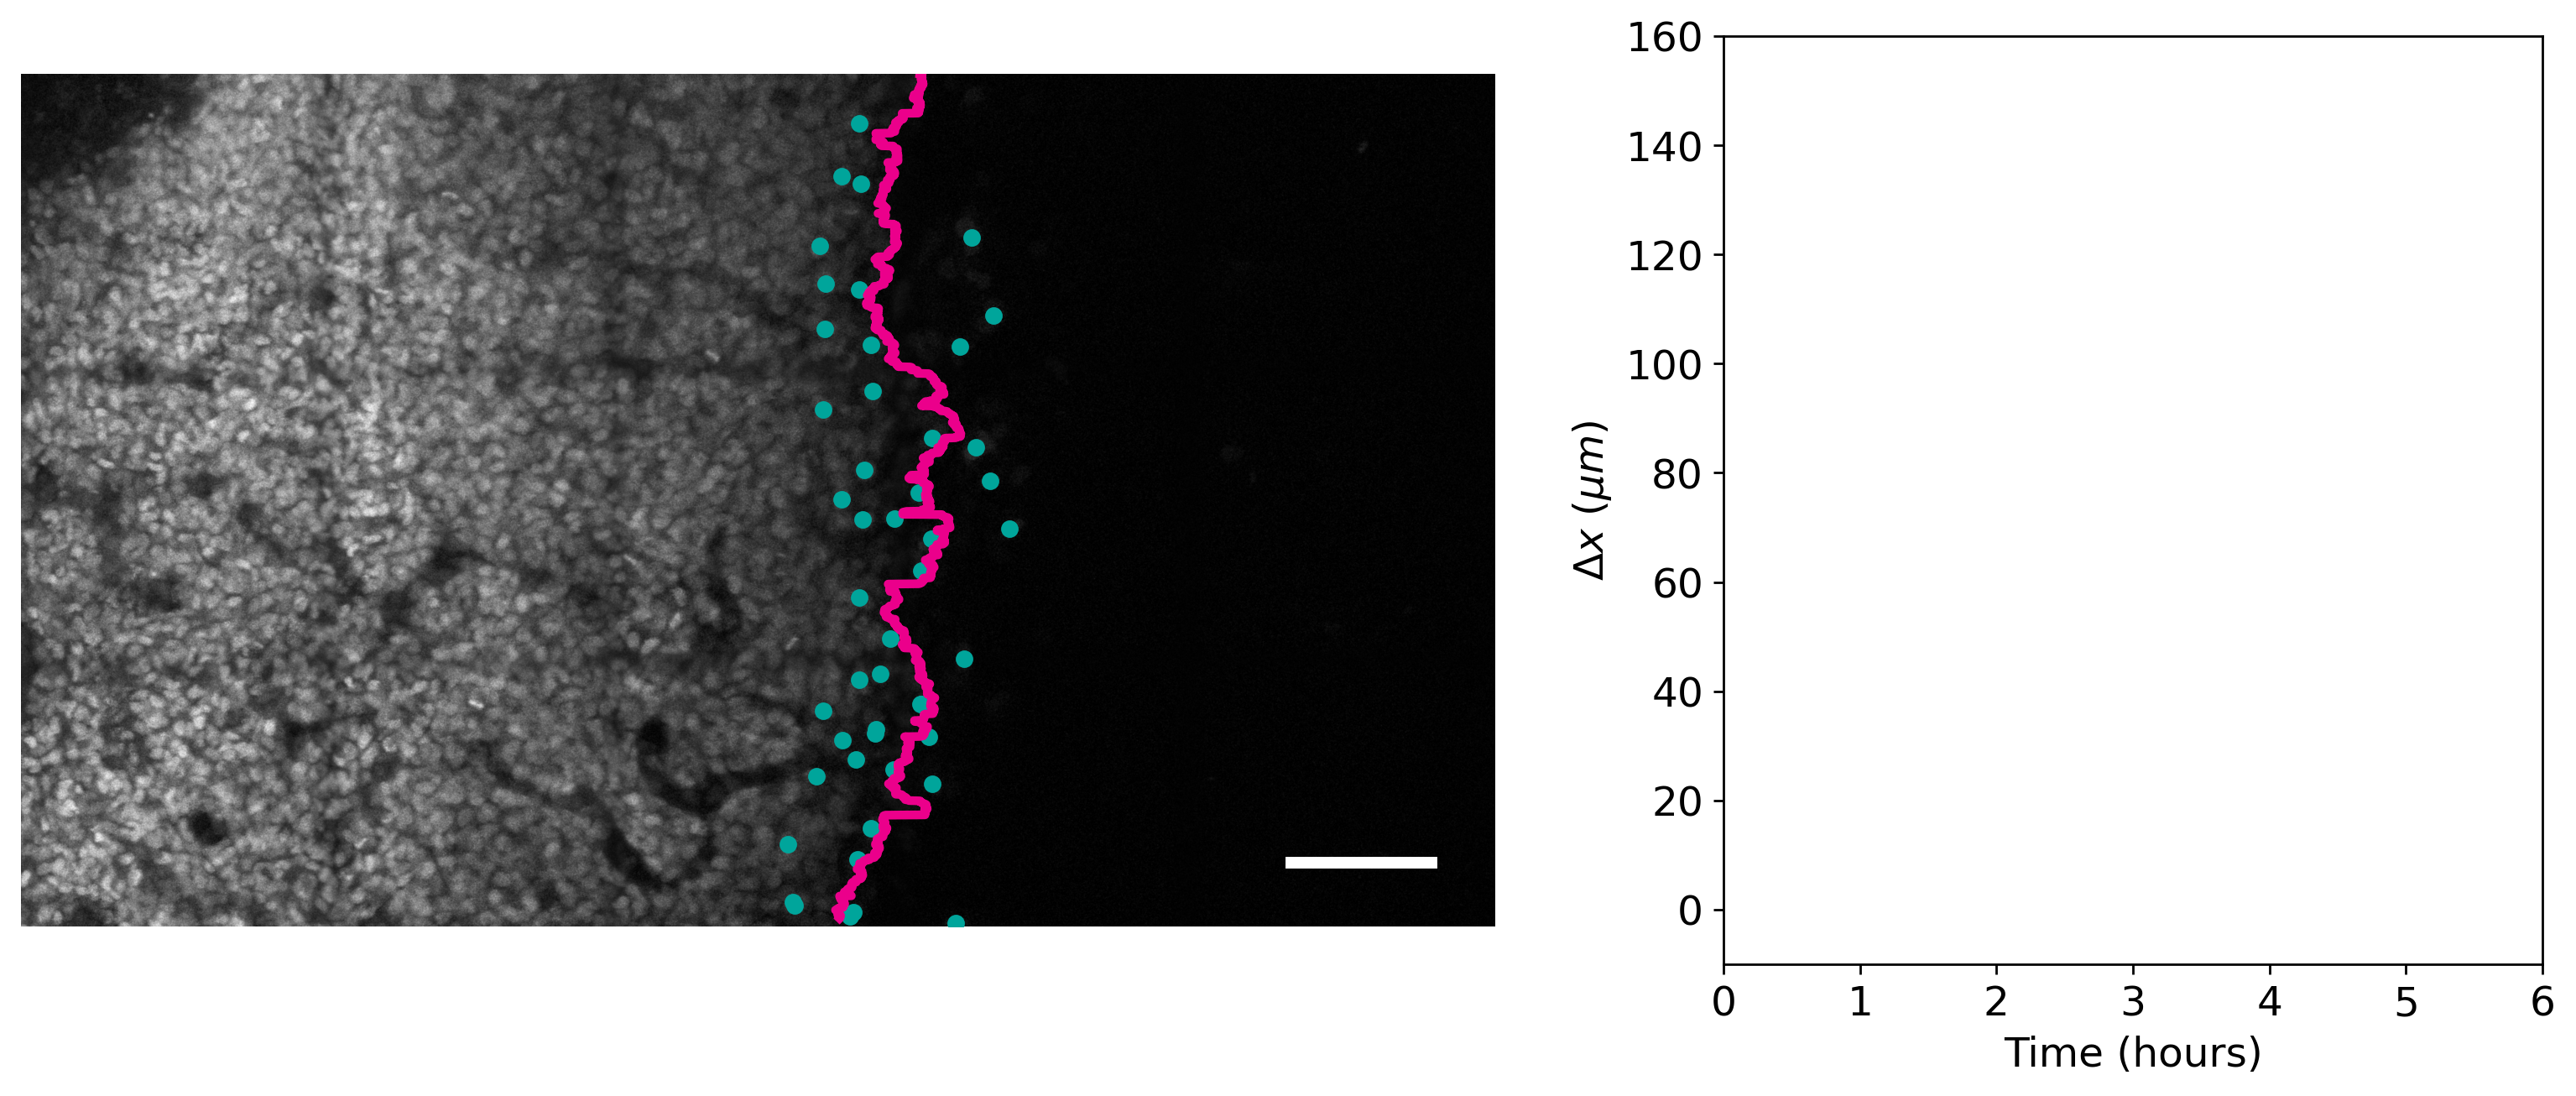

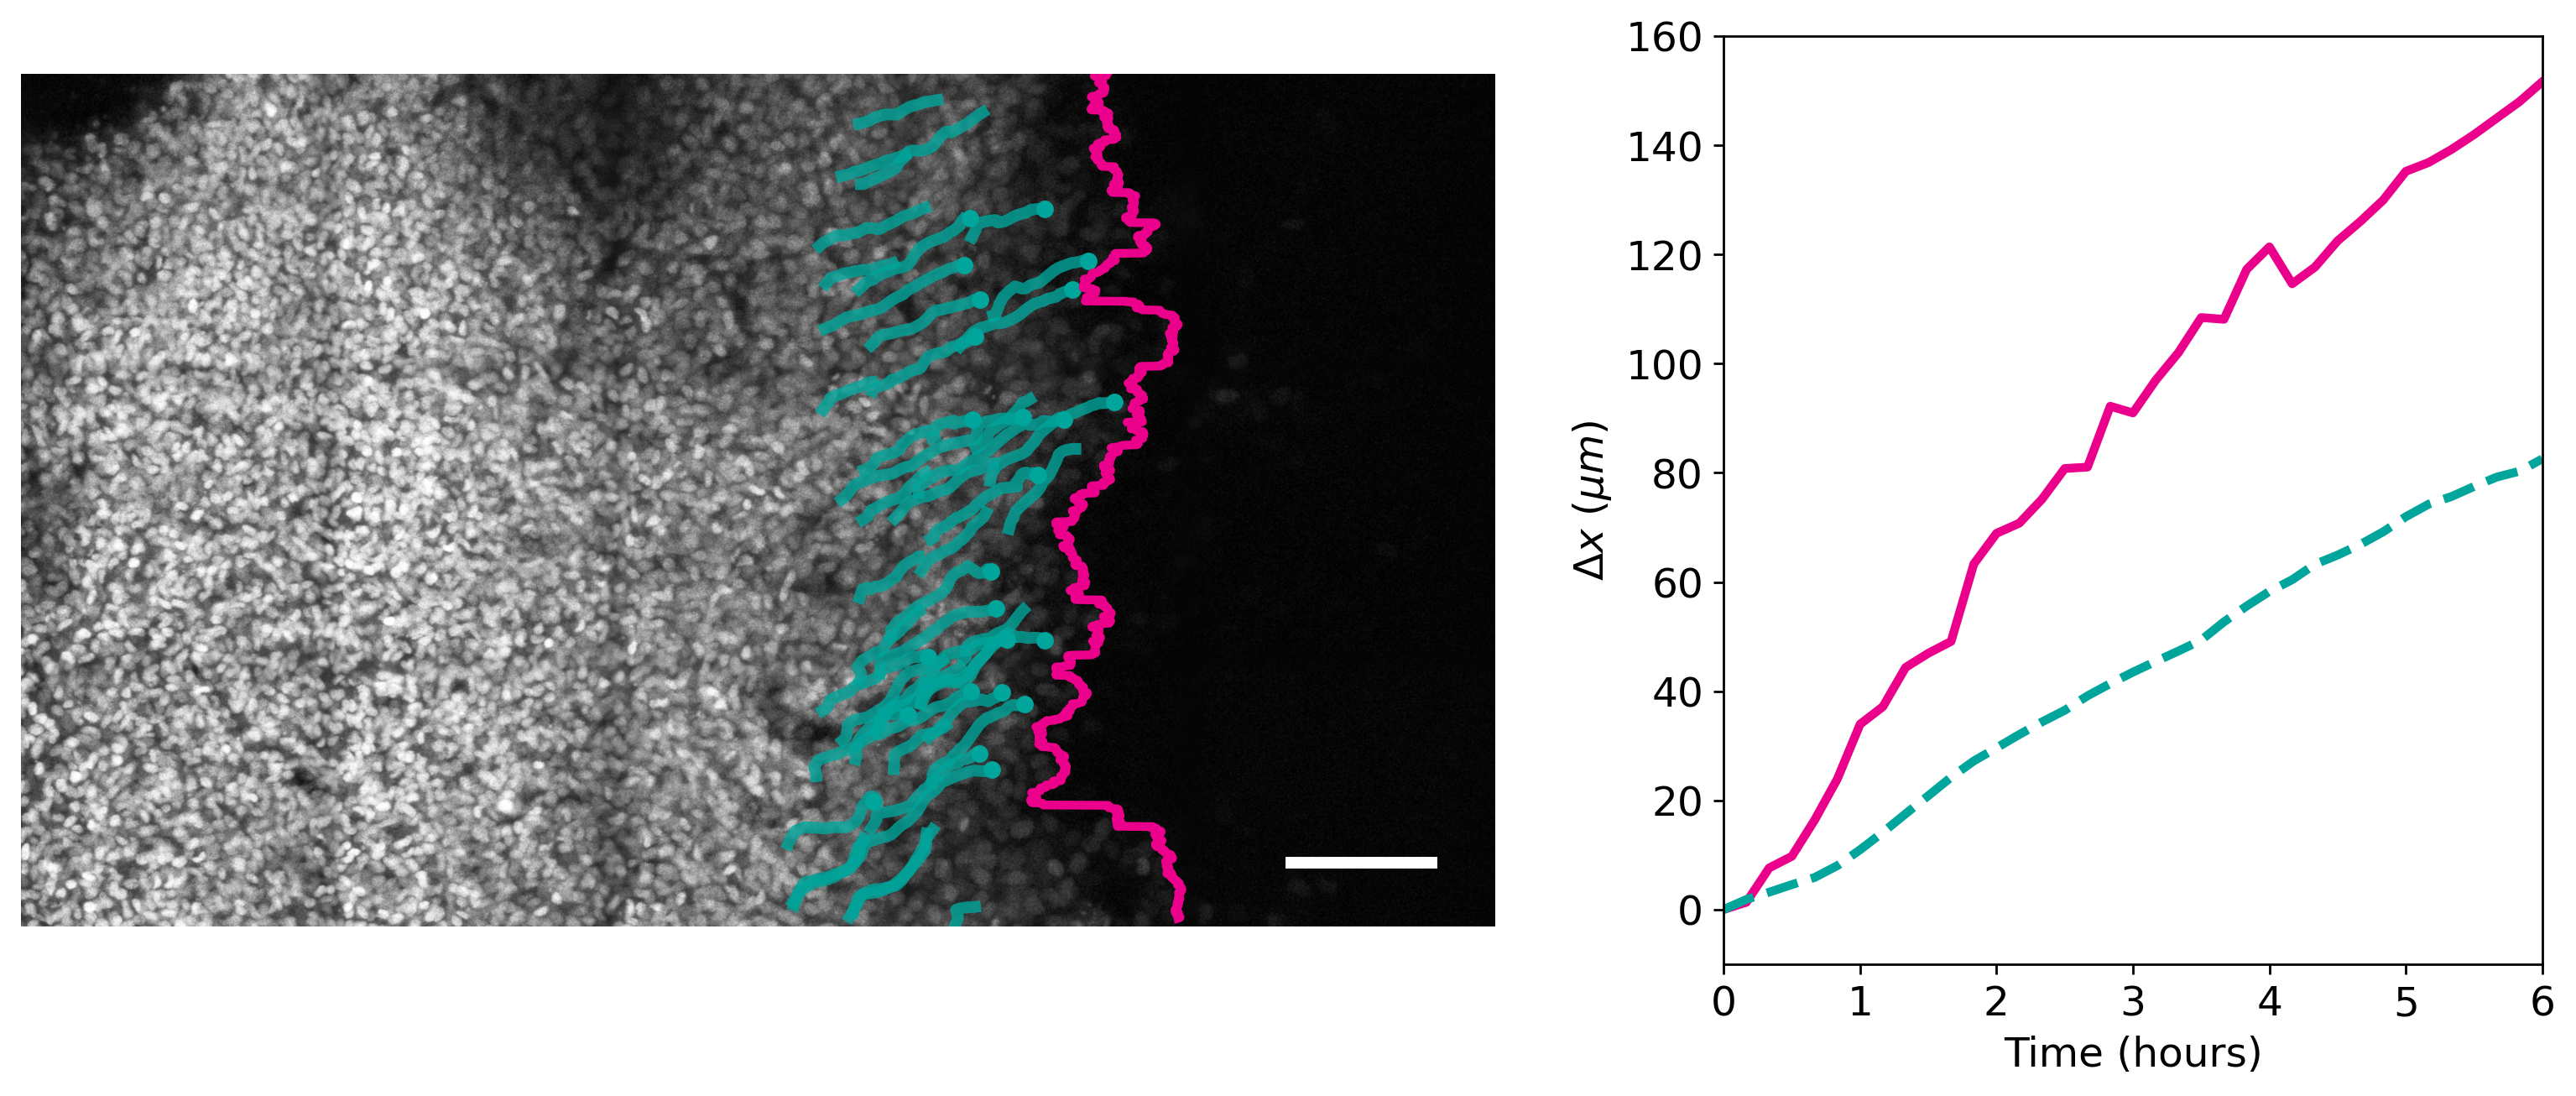

In [57]:
# Plot together and save
i1=video_idx;
i2=0;
tmax=37;
#colors_plot = [colors[0], colors[2]]; # [interface, cells]
colors_plot = ["#eb008b", "#00a59b"]
# colors_all = [[1, 0, 0], [0.8, 0, 0], [0.5, 0, 0]]; # colors for the groups of cells

#folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Video {}/Video_frames".format(video)
#t_sel = np.arange(tmax);
t_sel = [0, 36]; #np.arange(7)*6

for ti in range(len(t_sel)):
    frame = t_sel[ti]
    fig, axs = plt.subplots(1, 2, figsize=(13, 6), gridspec_kw={'width_ratios':[1.8,1]}, dpi=250) # figsize=(12, 5)
    plt.tight_layout()
    
    # ---- Image on the left ----
    # Plot image
    fname = fname_ids[video_idx]+"{}.tif".format(f'{frame:04}')
    img = mpimg.imread( os.path.join(folder_im, fname) );
    signal_all = img.astype(int); # Convert image from uint16 to int64
    img_plot = signal_all[lower:upper, :]

    # ADD scale bar (adjust offsets)
    # print(  size_px_all[video_idx][0] )
    offsets = [200, 200] # x, y
    sbar_width = np.round(100*pix_per_micron_all[video_idx])
    x_start = img_plot.shape[1] - sbar_width - offsets[0];
    x_scale_bar = x_start + np.array([0, sbar_width]) 
    x_scale_bar
    y_scale_bar = (img_plot.shape[0]-offsets[1])*np.ones(2)
    
    #axs[0].imshow(signal_all[lower:upper, :, :]) 
    axs[0].imshow(signal_all[lower:upper, :], aspect=1, cmap="gray" )  
    axs[0].plot( x_scale_bar, y_scale_bar, linewidth=4, color='w' )
    
    # Plot interface
    axs[0].plot(interfaces_all_0[frame, lower:upper], y_vals[:upper-lower], color=colors_plot[0], linewidth=3 ); # in microns
    axs[0].axis('off')
    axs[0].set_aspect(1)   
    
    # Plot cell tracks
    X_all = X_all_all[i1][i2];
    Y_all = Y_all_all[i1][i2];  
    Y_all_temp = Y_all - lower; # adjust Y-values according to cutoff
    img_height = signal_all[lower:upper, :].shape[0];
    
    X_all_filtered = np.array([np.zeros(tmax)]);
    Y_all_filtered = np.array([np.zeros(tmax)]);
    for idx in range(Y_all.shape[0]):
        if (np.nanmin(Y_all_temp[idx,:tmax])>0) & (np.nanmax(Y_all_temp[idx,:tmax])<img_height):
            X_all_filtered = np.append(X_all_filtered, [X_all[idx, :tmax]], axis=0);
            Y_all_filtered = np.append(Y_all_filtered, [Y_all_temp[idx, :tmax]], axis=0);
    X_all_filtered = X_all_filtered[1:];
    Y_all_filtered = Y_all_filtered[1:];
    
    # skip_idx = np.where(X_all_filtered[:, 0]==1260)[0][0]
    # X_all_filtered = np.delete(X_all_filtered, 35, 0);
    # Y_all_filtered = np.delete(Y_all_filtered, 35, 0);
    
    #axs[0].scatter(X_all_filtered[:, 0].T, Y_all_filtered[:, 0].T, s=3, marker='o', color=colors_all[i2]); # plot starting point
    axs[0].scatter(X_all_filtered[:, frame].T, Y_all_filtered[:, frame].T, s=25, marker='o', color=colors_plot[1]); # plot current position
    axs[0].plot(X_all_filtered[:, :frame].T, Y_all_filtered[:, :frame].T, alpha=0.8, linewidth=4, color=colors_plot[1]);
    
    # ---- Graph on the right ----
    # Plot data 
    t = frame+1;
    # (1) bulk interface
    t_all = np.arange(0, t_max_bulk_all[i1][i2])/6;
    col = bulk_col_heights[i2];
    heights_all = data_bulk_all[i1][i2].iloc[:, col];
    if i2 in normalize_height:
        heights_all = heights_all - heights_all[0];
    axs[1].plot(t_all[:t], heights_all[:t], '-', color=colors_plot[0], linewidth=3);    

    # (2) cell tracks
    t_all = np.arange(0, t_max_sc_all[i1][i2])/6;
    col = sc_col_heights[i2];
    col_sem = sc_col_sem[i2];
    heights_all = data_sc_all[i1][i2].iloc[:,col];
    sem_all = data_sc_all [i1][i2].iloc[:, col_sem]
    axs[1].plot(t_all[:t], heights_all[:t], '--', color=colors_plot[1], linewidth=3, label=names_compare[i2])
    
    # adjust axes
    axs[1].set(xlabel='Time (hours)', ylabel='$\Delta x$ ($\\mu m$)')
    axs[1].set(xlim=[t_lower, t_upper], ylim=[ylims[0], ylims[1]])
    #axs[1].set_aspect(0.07)
    #axs[1].set_aspect(0.06)
    #axs[1].set_aspect(0.04)
    axs[1].set_aspect(all_aspects[video_idx])
    
    plt.subplots_adjust(wspace=0.2)

    # save figure
    save_folder = '/Users/dang/Documents/Projects/Tabler_skull/Figures/temp/'
    #save_folder = "/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Image_with_plots_w_interface_and_tracks";
    #save_fname = "Image_and_plots_and_tracks_combined_MaxProjected_Stitched_Blurred_190305_ML1_OsxGFP_Explant_Video_1_(0-12hr)_{}.tif".format(f'{frame:04}');
    #save_fname = "Image_and_plots_and_tracks_combined_MaxProjected_Stitched_"+im_label_all[video_idx]+"_{}.tif".format(f'{frame:04}')
    save_fname = "Image_w_interface_tracks_and_plots"+video_fname_id+"_{}_final_colours.pdf".format(f'{frame:04}');

    plt.savefig( os.path.join(save_folder, "Video{}".format(video), save_fname) )

    plt.show();

In [51]:
os.path.join(save_folder, "Video{}".format(video), save_fname)

'/Users/dang/Documents/Projects/Tabler_skull/Data_Adrian_cell_tracks/Image_with_plots_w_interface_and_tracks/Video4/Image_w_interface_tracks_and_plotsMAX_BLUR_20200414AQR_osx_E13.5_020917.lif - TileScan_003_Merging_0036.png'

### Add scale bar (test)

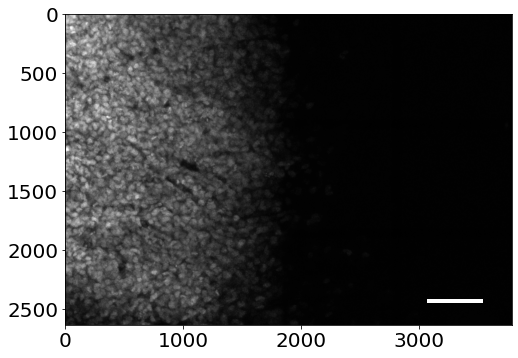

In [89]:
fname = fname_ids[video_idx]+"{}.tif".format(f'{frame:04}')
img = mpimg.imread( os.path.join(folder_im, fname) );
signal_all = img.astype(int); # Convert image from uint16 to int64
img_plot = signal_all[lower:upper, :]

# ADD scale bar
offsets = [200, 200] # x, y
sbar_width = np.round(100*pix_per_micron_all[video_idx])
x_start = img_plot.shape[1] - sbar_width - offsets[0];
x_scale_bar = x_start + np.array([0, sbar_width]) 
x_scale_bar
y_scale_bar = (img_plot.shape[0]-offsets[1])*np.ones(2)

plt.figure(figsize=(8,8));
#axs[0].imshow(signal_all[lower:upper, :, :]) 
plt.imshow(img_plot, aspect=1, cmap="gray" )  
plt.plot( x_scale_bar, y_scale_bar, linewidth=4, color='w' )
plt.show()

### Save as movie
Not completed

In [12]:
#import numpy as np
import matplotlib
matplotlib.use("Agg")
#import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,


NameError: name 'update_line' is not defined

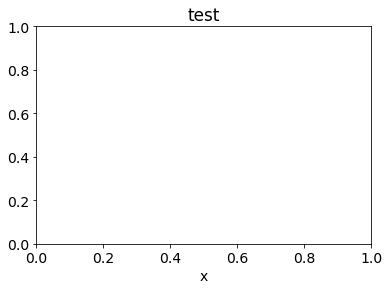

In [13]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
line_ani.save('lines.mp4', writer=writer)